# Data Preprocessing

## Import Packages and datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

import os
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 10000)
import warnings
warnings.simplefilter('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import pickle
import category_encoders as ce

from datetime import date
import datetime
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

In [656]:
listing = pd.read_csv('roofstock/roofstock_marketplace_listing_historical_full.csv')
transaction = pd.read_csv('roofstock/roofstock_marketplace_transactions_full.csv')
offer = pd.read_csv('roofstock/roofstock_marketplace_offers_full.csv')
buyer = pd.read_csv('roofstock/roofstock_marketplace_buyers_full.csv')
#newdf = pd.read_csv('latter_final.csv')
#df = pd.read_csv('latter_final.csv')

In [665]:
len(offer)

31852

## Delete Variables
* Text/ Unstructured feature: 
such as PROPERTYHIGHLIGHTS
* Features with over 50% missing values: 
such as  RESERVEDEPOSIT, all NAs
* Features explaining the same things: 
such as LISTING_SOURCE_ID and LISTING_SOURCE, only maintain the latter one.
* Useless Features: such as VIRTUALTOURURL
* Unique Identifier: such as ACCOUNT_ID

In [4]:
droplist=['REC_START_TS','REC_END_TS','CERTIFICATION_ID','ACCOUNT_ID','LISTING_STATUS_TYPE',
'COUNTRY','OPENHOUSE_PUBLISH_TS','OPENHOUSE_CONSIDER_OFFERS_TS','OPENHOUSE_END_TS',
'LISTING_SOURCE_ID', 'PROPERTYHIGHLIGHTS','PROPERTYMARKETINGPOINTS',
'VIRTUALTOURURL','MLSMODIFICATIONTIMESTAMP','SALE_PRICE',
'MONTHLYMANAGEMENTFEES','TURNOVER_FEE','AVMBPOADJVALUE',
'COMPUTEDRESERVEDEPOSIT','RESERVEDEPOSIT','MONTHLYASSETMANAGEMENTFEE',
'OCCUPANCYLASTUPDATEDDATE','LEASESTARTDATE','LEASEENDDATE','NOTES',
'ADDRESS1','ADDRESS2','CITY','DISTRICT','COUNTY','ZIP','ZIPPLUS4','EVENT_UTC','CREATED_TS',
'LISTING_ID','ATTICCONDITIONID','BASEMENTCONDITIONID','BATHROOMSCONDITIONID','BEDROOMSCONDITIONID',
'ELECTRICALCONDITIONID','EST_VALUATION','EXTERIORCONDITIONID','FEATUREDREASON','GARAGECONDITIONID','HVACCONDITIONID',
'INSPECTION_CONTINGENCY_REASON_ID','SOLD_DATE','STORIES','STRUCTURALCONDITIONID','UNITS',
'YEARLYCAPITALEXPENDITURESCOST','YEARLYREPAIRSMAINTENANCECOST','LISTING_INITIAL_PUBLISH_TS',
'LISTING_INTIAL_PUBLISH_DATE','LISTING_PUBLISH_DATE','LISTING_PUBLISH_TS','PROPERTY_ID','SALES_PENDING_DATE',
'PREVIOUS_ESCROW_CLOSING_DATE','EST_RENT_LOW','EST_RENT_HIGH','COMPUTEDRESERVEDEPOSITPERCENTAGE', 'Unnamed: 0',
'COMPUTEDDOWNPAYMENT','MARKETEDRENT','LATEPAYMENTMONTHS','PETFEEAMOUNT','PETSDEPOSITAMOUNT','RSRENTESTIMATE','AVMBPOVALUE']

newdf = newdf.drop(droplist,axis=1)
#记得删除state

In [ ]:
droplist = ['GMAPPOVLATITUDE','GMAPPOVLONGITUDE','EST_VALUATION_HIGH','EST_VALUATION_LOW',
           'LATITUDE','LONGITUDE']

newdf = newdf.drop(droplist,axis=1)

In [5]:
newdf.head()

,LISTING_STATUS,LISTING_STATUS_IS_ACTIVE,STATE,MARKET_ID,CBSA_CODE,LOTSIZE,SQUAREFEET,YEARBUILT,BEDROOMS,BATHROOMS,ISPOOL,ISHOA,TITLESTATUS,LATITUDE,LONGITUDE,GMAPHASSTREETVIEW,GMAPPOVHEADING,GMAPPOVPITCH,GMAPPOVLATITUDE,GMAPPOVLONGITUDE,FLOODRISKSCORE,SCHOOLELEMENTARYSCORE,SCHOOLMIDDLESCORE,SCHOOLHIGHSCORE,VISIBILITY_ID,PRICEVISIBILITY,HASAUDIO,CERTIFICATIONLEVEL,ALLOWEDFUNDINGTYPES,ISALLOWOFFER,ISALLOWPREVIEW,ISFEATURED,ISRENTGUARANTEED,ISSECURITIZED,INSPECTION_CONTINGENCY_REQUIRED,ALLOWABLE_SALE_TYPES,LISTING_SOURCE,INSPECTION_TYPE_ID,ISEXCLUSIVE,KITCHENCONDITIONID,LANDSCAPINGCONDITIONID,PLUMBINGCONDITIONID,ROOFCONDITIONID,ISELIGIBLEFORADS,NEIGHBORHOODSCORE,MLSNAME,MARKETPLACESORTORDER,LIST_PRICE,EST_VALUATION_LOW,EST_VALUATION_HIGH,MONTHLY_RENT,MARKET_RENT,MONTHLYHOA,YEARLYPROPERTYTAXES,YEARLYINSURANCECOST,PREVIOUSYEARLYPROPERTYTAXES,EST_REPAIR_COST,ASSUMED_DOWNPAYMENT_TYPE,COMPUTED_GROSS_YIELD,COMPUTED_CAP_RATE,COMPUTEDTOTALEXPENSES,COMPUTEDTOTALEXPENSESPERCENTAGE,COMPUTEDCASHFLOW,COMPUTEDAPPRECIATION,COMPUTEDLEVEREDIRR,COMPUTEDLEVEREDCASHONCASH,COMPUTEDLEVEREDNETYIELD,COMPUTEDLEVEREDANNUALCASHFLOW,COMPUTEDTOTALRETURN,COMPUTEDTOTALOPERATINGEXPENSEPERCENT,COMPUTEDLEVEREDINITIALOUTLAY,COMPUTEDLOANPAYMENTS,COMPUTEDEXPENSESANDRESERVES,COMPUTEDEXPECTEDRENT,COMPUTEDDOWNPAYMENTPERCENTAGE,COMPUTEDPROPERTYTAXES,OCCUPANCY,LEASINGSTATUS,PAYMENTSTATUS,LEASEMONTHLYRENT,SECURITYDEPOSITAMOUNT,HASPET,ISPETSDEPOSIT,ISLEASECONCESSIONS,ISSECTION8,ISRENTERSINSURANCEREQUIRED,ISTENANTBACKGROUNDCHECKED,ISTENANTINCOMEABOVE3X,ISTENANTMAYTERMINATEEARLY,ISTENANTPURCHASEOPTION,OWNERELECTRIC,OWNERGAS,OWNERWATER,OWNERGARBAGE,OWNERPOOL,OWNERLANDSCAPING,OWNERPESTCONTROL,OWNERREFRIGERATOR,OWNERDISHWASHER,OWNERWASHER,OWNERDRYER,OWNERMICROWAVE,OWNERSTOVE,OFFER_PRICE,diff_days
0,For Sale,True,DC,9052.0,47900.0,787439.0,55000.0,1792.0,16.0,35.0,False,True,1.0,38.89766,-77.03658,True,0.0,4.0,38.896361,-77.036524,X,6.0,NaN,7.0,10,0,False,100.0,21.0,True,False,True,False,False,False,1,Direct,NaN,True,NaN,NaN,NaN,NaN,False,5.0,NaN,0,400000000.0,375000000.0,425000000.0,2100000.0,2040000.0,60000.0,400000.0,1688000.4,NaN,NaN,0.0,0.063,0.0446,6071400.4,0.2068,17868599.6,0.0459,0.12,-0.01,-0.0046,-1868304.51,94555302.21,0.2536,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,2100000.0,250000.0,True,NaN,True,True,True,False,True,True,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,-9.0,1015
1,For Sale,True,DC,9052.0,47900.0,787439.0,55000.0,1792.0,16.0,35.0,False,True,1.0,38.89766,-77.03658,True,0.0,4.0,38.896361,-77.036524,X,6.0,NaN,7.0,10,0,False,100.0,21.0,True,False,True,False,False,False,1,Direct,NaN,True,NaN,NaN,NaN,NaN,False,5.0,NaN,0,400000000.0,375000000.0,425000000.0,2100000.0,2040000.0,60000.0,400000.0,1688000.4,NaN,NaN,0.0,0.063,0.0446,6071400.4,0.2068,17868599.6,0.0459,0.11,-0.02,-0.0074,-2968333.67,87101404.07,0.2536,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,2100000.0,250000.0,True,NaN,True,True,True,False,True,True,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,-9.0,1015
2,For Sale,True,DC,9052.0,47900.0,787439.0,55000.0,1792.0,16.0,35.0,False,True,1.0,38.89766,-77.03658,True,0.0,4.0,38.896361,-77.036524,X,7.0,7.0,8.0,10,0,False,100.0,21.0,True,False,True,False,False,False,1,Direct,NaN,True,NaN,NaN,NaN,NaN,False,5.0,NaN,0,400000000.0,375000000.0,425000000.0,2100000.0,2040000.0,60000.0,400000.0,1688000.4,NaN,NaN,0.0,0.063,0.0446,6071400.4,0.2068,17868599.6,0.0459,0.11,-0.02,-0.0074,-2968333.67,87101404.07,0.2536,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,2100000.0,250000.0,True,NaN,True,True,True,False,True,True,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,-9.0,1015
3,For Sale,True,DC,9052.0,47900.0,787439.0,55000.0,1792.0,16.0,35.0,False,True,1.0,38.89766,-77.03658,True,0.0,4.0,38.896361,-77.036524,X,7.0,7.0,8.0,10,0,False,100.0,21.0,True,False,True,False,False,False,1,Direct,NaN,True,NaN,NaN,NaN,NaN,False,5.0,NaN,0,400000000.0,375000000.0,425000000.0,2100000.0,2040000.0,60000.0,400000.0,1688000.4,NaN,NaN,0.0,0.063,0.0446,NaN,NaN,17868599.6,0.04

## Fill Missing Value
* Categorical feature: 
create a new level
* Numerical feature: 
group by STATE, 
filtered with price range of +- 20000,
then fill NA with the group’s median


In [ ]:
#### FILL MISSING VALUE
newdf.MARKET_ID = newdf.MARKET_ID.fillna(-9999.)
newdf.CBSA_CODE = newdf.CBSA_CODE.fillna(-99999.)
newdf.LOTSIZE = newdf.LOTSIZE.fillna(0.)

newdf['SQUAREFEET']=newdf['SQUAREFEET'].fillna(-9999)
for i in tqdm(list(newdf[newdf['SQUAREFEET']==-9999].index)):
        c_state=newdf['STATE'][i]
        c_price=newdf['LIST_PRICE'][i]
        c_df=newdf[newdf['STATE']==c_state]
        cc_df=c_df[(c_df['LIST_PRICE']>=c_price-20000) & (c_df['LIST_PRICE'] <=c_price+20000)]
        cc_df=cc_df[cc_df['SQUAREFEET']!=-9999]
        fill_square=np.median(cc_df['SQUAREFEET'])
        newdf.set_value(i,'SQUAREFEET',fill_square)
newdf['SQUAREFEET']=df['SQUAREFEET'].fillna(np.median(df['SQUAREFEET']))
    
newdf['BEDROOMS']=newdf['BEDROOMS'].fillna(-999)
for i in tqdm(list(newdf[newdf['BEDROOMS']== -999].index)):
    c_state=newdf['STATE'][i]
    c_price=newdf['LIST_PRICE'][i]
    c_df=newdf[newdf['STATE']==c_state]
    cc_df=c_df[(c_df['LIST_PRICE']>=c_price-20000) & (c_df['LIST_PRICE'] <=c_price+20000)]
    cc_df=cc_df[cc_df['BEDROOMS']!=-999]
    fill_square=np.median(cc_df['BEDROOMS'])
    newdf.set_value(i,'BEDROOMS',fill_square)
newdf['BEDROOMS']=df['BEDROOMS'].fillna(np.median(df['BEDROOMS']))
    

newdf['BATHROOMS']=newdf['BATHROOMS'].fillna(-999)
for i in list(newdf[newdf['BATHROOMS']==-999].index):
    c_state=newdf['STATE'][i]
    c_price=newdf['LIST_PRICE'][i]
    c_df=newdf[newdf['STATE']==c_state]
    cc_df=c_df[(c_df['LIST_PRICE']>=c_price-20000) & (c_df['LIST_PRICE'] <=c_price+20000)]
    cc_df=cc_df[cc_df['BATHROOMS']!=-999]
    fill_square=np.median(cc_df['BATHROOMS'])
    newdf.set_value(i,'BATHROOMS',fill_square)
newdf['BATHROOMS']=df['BATHROOMS'].fillna(np.median(df['BATHROOMS']))
    
newdf.ISPOOL = newdf.ISPOOL.fillna(False)
newdf.ISHOA = newdf.ISHOA.fillna(False)
newdf.LONGITUDE = newdf.LONGITUDE.fillna(0.)
newdf.LATITUDE = newdf.LATITUDE.fillna(0.)
newdf.GMAPHASSTREETVIEW = newdf.GMAPHASSTREETVIEW.fillna(False)
newdf.GMAPPOVHEADING = newdf.GMAPPOVHEADING.fillna(-9999.)
newdf.GMAPPOVPITCH = newdf.GMAPPOVPITCH.fillna(-9999.)
newdf.GMAPPOVLATITUDE = newdf.GMAPPOVLATITUDE.fillna(0.)
newdf.GMAPPOVLONGITUDE = newdf.GMAPPOVLONGITUDE.fillna(0.)
newdf.SCHOOLELEMENTARYSCORE = newdf.SCHOOLELEMENTARYSCORE.fillna(0.)
newdf.SCHOOLMIDDLESCORE = newdf.SCHOOLMIDDLESCORE.fillna(0.)
newdf.SCHOOLHIGHSCORE = newdf.SCHOOLHIGHSCORE.fillna(0.)
newdf.CERTIFICATIONLEVEL = newdf.CERTIFICATIONLEVEL.fillna(-9999)
newdf.ALLOWEDFUNDINGTYPES = newdf.ALLOWEDFUNDINGTYPES.fillna(-9999)
newdf.INSPECTION_TYPE_ID = newdf.INSPECTION_TYPE_ID.fillna(-9999)
newdf.KITCHENCONDITIONID = newdf.KITCHENCONDITIONID.fillna(-9999)
newdf.LANDSCAPINGCONDITIONID = newdf.LANDSCAPINGCONDITIONID.fillna(-9999)

newdf.PLUMBINGCONDITIONID = newdf.PLUMBINGCONDITIONID.fillna(-9999)
newdf.ROOFCONDITIONID = newdf.ROOFCONDITIONID.fillna(-9999)
newdf.NEIGHBORHOODSCORE = newdf.NEIGHBORHOODSCORE.fillna(0.)
newdf.MLSNAME = newdf.MLSNAME.fillna('Not from mls')
newdf.EST_VALUATION_LOW = newdf.EST_VALUATION_LOW.fillna(-9999)
newdf.EST_VALUATION_HIGH = newdf.EST_VALUATION_HIGH.fillna(-9999)
newdf.MONTHLYHOA = newdf.MONTHLYHOA.fillna(-9999)

newdf['MONTHLY_RENT']=newdf['MONTHLY_RENT'].fillna(-9999)
for i in list(newdf[newdf['MONTHLY_RENT']==-9999].index):
    c_state=newdf['STATE'][i]
    c_price=newdf['LIST_PRICE'][i]
    c_df=newdf[newdf['STATE']==c_state]
    cc_df=c_df[(c_df['LIST_PRICE']>=c_price-20000) & (c_df['LIST_PRICE'] <=c_price+20000)]
    cc_df=cc_df[cc_df['MONTHLY_RENT']!=-9999]
    fill_square=np.median(cc_df['MONTHLY_RENT'])
    newdf.set_value(i,'MONTHLY_RENT',fill_square)
newdf['MONTHLY_RENT']=newdf['MONTHLY_RENT'].fillna(np.median(newdf['MONTHLY_RENT']))
    
newdf['MARKET_RENT']=newdf['MARKET_RENT'].fillna(-9999)
for i in list(newdf[newdf['MARKET_RENT']==-9999].index):
    c_state=newdf['STATE'][i]
    c_price=newdf['LIST_PRICE'][i]
    c_df=newdf[newdf['STATE']==c_state]
    cc_df=c_df[(c_df['LIST_PRICE']>=c_price-20000) & (c_df['LIST_PRICE'] <=c_price+20000)]
    cc_df=cc_df[cc_df['MARKET_RENT']!=-9999]
    fill_square=np.median(cc_df['MARKET_RENT'])
    newdf.set_value(i,'MARKET_RENT',fill_square)
newdf['MARKET_RENT']=newdf['MARKET_RENT'].fillna(np.median(newdf['MARKET_RENT']))
    
newdf['YEARLYPROPERTYTAXES']=newdf['YEARLYPROPERTYTAXES'].fillna(-9999)
for i in list(newdf[newdf['YEARLYPROPERTYTAXES']==-9999].index):
    c_state=newdf['STATE'][i]
    c_price=newdf['LIST_PRICE'][i]
    c_df=newdf[newdf['STATE']==c_state]
    cc_df=c_df[(c_df['LIST_PRICE']>=c_price-20000) & (c_df['LIST_PRICE'] <=c_price+20000)]
    cc_df=cc_df[cc_df['YEARLYPROPERTYTAXES']!=-9999]
    fill_square=np.median(cc_df['YEARLYPROPERTYTAXES'])
    newdf.set_value(i,'YEARLYPROPERTYTAXES',fill_square)
newdf['YEARLYPROPERTYTAXES']=newdf['YEARLYPROPERTYTAXES'].fillna(np.median(newdf['YEARLYPROPERTYTAXES']))

newdf['YEARLYINSURANCECOST']=newdf['YEARLYINSURANCECOST'].fillna(-9999)
for i in list(newdf[newdf['YEARLYINSURANCECOST']==-9999].index):
    c_state=newdf['STATE'][i]
    c_price=newdf['LIST_PRICE'][i]
    c_df=newdf[newdf['STATE']==c_state]
    cc_df=c_df[(c_df['LIST_PRICE']>=c_price-20000) & (c_df['LIST_PRICE'] <=c_price+20000)]
    c_df=cc_df[cc_df['YEARLYINSURANCECOST']!=-9999]
    fill_square=np.median(cc_df['YEARLYINSURANCECOST'])
    newdf.set_value(i,'YEARLYINSURANCECOST',fill_square)
newdf['YEARLYINSURANCECOST']=newdf['YEARLYINSURANCECOST'].fillna(np.median(newdf['YEARLYINSURANCECOST']))

newdf['PREVIOUSYEARLYPROPERTYTAXES']=newdf['PREVIOUSYEARLYPROPERTYTAXES'].fillna(-9999)
for i in list(newdf[newdf['PREVIOUSYEARLYPROPERTYTAXES']==-9999].index):
    c_state=newdf['STATE'][i]
    c_price=newdf['LIST_PRICE'][i]
    c_df=newdf[newdf['STATE']==c_state]
    cc_df=c_df[(c_df['LIST_PRICE']>=c_price-20000) & (c_df['LIST_PRICE'] <=c_price+20000)]
    c_df=cc_df[cc_df['PREVIOUSYEARLYPROPERTYTAXES']!=-9999]
    fill_square=np.median(cc_df['PREVIOUSYEARLYPROPERTYTAXES'])
    newdf.set_value(i,'PREVIOUSYEARLYPROPERTYTAXES',fill_square)
newdf['PREVIOUSYEARLYPROPERTYTAXES']=newdf['PREVIOUSYEARLYPROPERTYTAXES'].fillna(np.median(newdf['PREVIOUSYEARLYPROPERTYTAXES']))
    
newdf['EST_REPAIR_COST']=newdf['EST_REPAIR_COST'].fillna(-9999)
for i in list(newdf[newdf['EST_REPAIR_COST']==-9999].index):
    c_state=newdf['STATE'][i]
    c_price=newdf['LIST_PRICE'][i]
    c_df=newdf[newdf['STATE']==c_state]
    cc_df=c_df[(c_df['LIST_PRICE']>=c_price-20000) & (c_df['LIST_PRICE'] <=c_price+20000)]
    c_df=cc_df[cc_df['EST_REPAIR_COST']!=-9999]
    fill_square=np.median(cc_df['EST_REPAIR_COST'])
    newdf.set_value(i,'EST_REPAIR_COST',fill_square)
newdf['EST_REPAIR_COST']=newdf['EST_REPAIR_COST'].fillna(np.median(newdf['EST_REPAIR_COST']))
    
newdf['COMPUTED_GROSS_YIELD']=newdf['COMPUTED_GROSS_YIELD'].fillna(-9999)
for i in list(newdf[newdf['COMPUTED_GROSS_YIELD']==-9999].index):
    c_state=newdf['STATE'][i]
    c_price=newdf['LIST_PRICE'][i]
    c_df=newdf[newdf['STATE']==c_state]
    cc_df=c_df[(c_df['LIST_PRICE']>=c_price-20000) & (c_df['LIST_PRICE'] <=c_price+20000)]
    c_df=cc_df[cc_df['COMPUTED_GROSS_YIELD']!=-9999]
    fill_square=np.median(cc_df['COMPUTED_GROSS_YIELD'])
    newdf.set_value(i,'COMPUTED_GROSS_YIELD',fill_square)
newdf['COMPUTED_GROSS_YIELD']=newdf['COMPUTED_GROSS_YIELD'].fillna(np.median(newdf['COMPUTED_GROSS_YIELD']))
    
newdf['COMPUTED_CAP_RATE']=newdf['COMPUTED_CAP_RATE'].fillna(-9999)
for i in list(newdf[newdf['COMPUTED_CAP_RATE']==-9999].index):
    c_state=newdf['STATE'][i]
    c_price=newdf['LIST_PRICE'][i]
    c_df=newdf[newdf['STATE']==c_state]
    cc_df=c_df[(c_df['LIST_PRICE']>=c_price-20000) & (c_df['LIST_PRICE'] <=c_price+20000)]
    c_df=cc_df[cc_df['COMPUTED_CAP_RATE']!=-9999]
    fill_square=np.median(cc_df['COMPUTED_CAP_RATE'])
    newdf.set_value(i,'COMPUTED_CAP_RATE',fill_square)
newdf['COMPUTED_CAP_RATE']=newdf['COMPUTED_CAP_RATE'].fillna(np.median(newdf['COMPUTED_CAP_RATE']))


In [12]:

newdf['COMPUTEDTOTALEXPENSES']=newdf['COMPUTEDTOTALEXPENSES'].fillna(-9999)
for i in tqdm(list(newdf[newdf['COMPUTEDTOTALEXPENSES']==-9999].index)):
    c_state=newdf['STATE'][i]
    c_price=newdf['LIST_PRICE'][i]
    c_df=newdf[newdf['STATE']==c_state]
    cc_df=c_df[(c_df['LIST_PRICE']>=c_price-20000) & (c_df['LIST_PRICE'] <=c_price+20000)]
    c_df=cc_df[cc_df['COMPUTEDTOTALEXPENSES']!=-9999]
    fill_square=np.median(cc_df['COMPUTEDTOTALEXPENSES'])
    newdf.set_value(i,'COMPUTEDTOTALEXPENSES',fill_square)
newdf['COMPUTEDTOTALEXPENSES']=newdf['COMPUTEDTOTALEXPENSES'].fillna(np.median(newdf['COMPUTEDTOTALEXPENSES']))

newdf.COMPUTEDTOTALEXPENSESPERCENTAGE = newdf.COMPUTEDTOTALEXPENSESPERCENTAGE.fillna(0.)
newdf.COMPUTEDCASHFLOW = newdf.COMPUTEDCASHFLOW.fillna(0.)
newdf.COMPUTEDAPPRECIATION = newdf.COMPUTEDAPPRECIATION.fillna(0.)
newdf.COMPUTEDLEVEREDIRR = newdf.COMPUTEDLEVEREDIRR.fillna(0.)
newdf.COMPUTEDLEVEREDCASHONCASH = newdf.COMPUTEDLEVEREDCASHONCASH.fillna(0.)
newdf.COMPUTEDLEVEREDNETYIELD = newdf.COMPUTEDLEVEREDNETYIELD.fillna(0.)
newdf.COMPUTEDLEVEREDANNUALCASHFLOW = newdf.COMPUTEDLEVEREDANNUALCASHFLOW.fillna(0.)
newdf.COMPUTEDTOTALRETURN = newdf.COMPUTEDTOTALRETURN.fillna(0.)
newdf.COMPUTEDTOTALOPERATINGEXPENSEPERCENT = newdf.COMPUTEDTOTALOPERATINGEXPENSEPERCENT.fillna(0.)
newdf.COMPUTEDLEVEREDINITIALOUTLAY = newdf.COMPUTEDLEVEREDINITIALOUTLAY.fillna(0.)
newdf.COMPUTEDLOANPAYMENTS = newdf.COMPUTEDLOANPAYMENTS.fillna(0.)
newdf.COMPUTEDEXPENSESANDRESERVES = newdf.COMPUTEDEXPENSESANDRESERVES.fillna(0.)
newdf.COMPUTEDEXPECTEDRENT = newdf.COMPUTEDEXPECTEDRENT.fillna(0.)
newdf.COMPUTEDDOWNPAYMENTPERCENTAGE = newdf.COMPUTEDDOWNPAYMENTPERCENTAGE.fillna(0.)
newdf.COMPUTEDPROPERTYTAXES = newdf.COMPUTEDPROPERTYTAXES.fillna(0.)
newdf.OCCUPANCY = newdf.OCCUPANCY.fillna(0.)
newdf.LEASEMONTHLYRENT = newdf.LEASEMONTHLYRENT.fillna(0.)
newdf.SECURITYDEPOSITAMOUNT = newdf.SECURITYDEPOSITAMOUNT.fillna(0.)
newdf.HASPET = newdf.HASPET.fillna(False)
newdf.ISPETSDEPOSIT = newdf.ISPETSDEPOSIT.fillna(False)
newdf.ISLEASECONCESSIONS = newdf.ISLEASECONCESSIONS.fillna(False)
newdf.ISSECTION8 = newdf.ISSECTION8.fillna(False)
newdf.ISRENTERSINSURANCEREQUIRED = newdf.ISRENTERSINSURANCEREQUIRED.fillna(False)
newdf.ISTENANTBACKGROUNDCHECKED = newdf.ISTENANTBACKGROUNDCHECKED.fillna(False)
newdf.ISTENANTINCOMEABOVE3X = newdf.ISTENANTINCOMEABOVE3X.fillna(False)
newdf.ISTENANTMAYTERMINATEEARLY = newdf.ISTENANTMAYTERMINATEEARLY.fillna(False)
newdf.ISTENANTPURCHASEOPTION = newdf.ISTENANTPURCHASEOPTION.fillna(False)




 34%|███▍      | 1519/4467 [00:35<01:03, 46.74it/s]


 68%|██████▊   | 3058/4467 [01:09<00:31, 44.97it/s]


100%|██████████| 4467/4467 [01:41<00:00, 44.00it/s]


In [13]:
newdf['OWNERELECTRIC']=newdf['OWNERELECTRIC'].fillna(-9999)
for i in tqdm(list(newdf[newdf['OWNERELECTRIC']==-9999].index)):
    c_state=newdf['STATE'][i]
    c_price=newdf['LIST_PRICE'][i]
    c_df=newdf[newdf['STATE']==c_state]
    cc_df=c_df[(c_df['LIST_PRICE']>=c_price-20000) & (c_df['LIST_PRICE'] <=c_price+20000)]
    c_df=cc_df[cc_df['OWNERELECTRIC']!=-9999]
    fill_square=np.median(cc_df['OWNERELECTRIC'])
    newdf.set_value(i,'OWNERELECTRIC',fill_square)
newdf['OWNERELECTRIC']=newdf['OWNERELECTRIC'].fillna(np.median(newdf['OWNERELECTRIC']))
    



  3%|▎         | 2172/74781 [00:33<22:52, 52.91it/s]


  6%|▌         | 4303/74781 [01:06<28:36, 41.06it/s]


  8%|▊         | 5939/74781 [01:40<18:20, 62.55it/s]


 11%|█         | 7954/74781 [02:14<20:20, 54.74it/s]


 13%|█▎        | 9912/74781 [02:47<18:38, 57.98it/s]


 16%|█▌        | 11721/74781 [03:19<13:05, 80.23it/s]


 18%|█▊        | 13805/74781 [03:52<18:12, 55.82it/s]


 21%|██        | 15812/74781 [04:25<12:46, 76.96it/s]


 24%|██▎       | 17574/74781 [04:58<17:44, 53.74it/s]


 26%|██▌       | 19509/74781 [05:30<17:33, 52.45it/s]


 29%|██▊       | 21452/74781 [06:03<13:38, 65.18it/s]


 31%|███       | 23145/74781 [06:36<21:46, 39.53it/s]


 34%|███▎      | 25138/74781 [07:09<16:44, 49.41it/s]


 36%|███▌      | 26905/74781 [07:42<12:01, 66.38it/s]


 39%|███▊      | 28794/74781 [08:14<15:26, 49.63it/s]


 41%|████      | 30698/74781 [08:47<17:29, 41.98it/s]


 43%|████▎     | 32200/74781 [09:20<16:57, 41.84it/s]


 45%|████▌     | 33735/74781 [09:53<16:13, 42.15it/s]


 47%|████▋     | 35273/74781 [10:27<13:21, 49.29it/s]


 49%|████▉     | 36810/74781 [11:00<11:42, 54.08it/s]


 52%|█████▏    | 38525/74781 [11:32<11:51, 50.94it/s]


 54%|█████▍    | 40299/74781 [12:05<10:53, 52.78it/s]


 56%|█████▌    | 42058/74781 [12:37<10:14, 53.27it/s]


 59%|█████▊    | 43822/74781 [13:10<08:58, 57.53it/s]


 61%|██████    | 45539/74781 [13:42<09:21, 52.12it/s]


 63%|██████▎   | 47207/74781 [14:15<08:11, 56.12it/s]


 65%|██████▌   | 48795/74781 [14:48<09:55, 43.67it/s]


 67%|██████▋   | 50266/74781 [15:20<09:46, 41.77it/s]


 69%|██████▉   | 51801/74781 [15:54<07:46, 49.30it/s]


 71%|███████▏  | 53353/74781 [16:26<07:55, 45.07it/s]


 73%|███████▎  | 54936/74781 [17:00<03:44, 88.28it/s]


 76%|███████▌  | 56565/74781 [17:33<05:41, 53.32it/s]


 78%|███████▊  | 58129/74781 [18:07<06:55, 40.11it/s]


 80%|███████▉  | 59680/74781 [18:40<05:54, 42.62it/s]


 82%|████████▏ | 61295/74781 [19:14<05:03, 44.42it/s]


 84%|████████▍ | 63062/74781 [19:47<04:09, 46.94it/s]


 87%|████████▋ | 64829/74781 [20:20<03:04, 53.79it/s]


 89%|████████▉ | 66611/74781 [20:52<02:33, 53.28it/s]


 91%|█████████▏| 68354/74781 [21:25<02:17, 46.89it/s]


 94%|█████████▎| 70069/74781 [21:58<01:35, 49.28it/s]


 96%|█████████▌| 71815/74781 [22:31<01:01, 48.19it/s]


 98%|█████████▊| 73613/74781 [23:04<00:24, 46.80it/s]


100%|██████████| 74781/74781 [23:26<00:00, 53.19it/s]


In [14]:
newdf['OWNERELECTRIC'].isnull().sum()

0

In [15]:
newdf['OWNERGAS']=newdf['OWNERGAS'].fillna(-9999)
for i in tqdm(list(newdf[newdf['OWNERGAS']==-9999].index)):
    c_state=newdf['STATE'][i]
    c_price=newdf['LIST_PRICE'][i]
    c_df=newdf[newdf['STATE']==c_state]
    cc_df=c_df[(c_df['LIST_PRICE']>=c_price-20000) & (c_df['LIST_PRICE'] <=c_price+20000)]
    c_df=cc_df[cc_df['OWNERGAS']!=-9999]
    fill_square=np.median(cc_df['OWNERGAS'])
    newdf.set_value(i,'OWNERGAS',fill_square) 
newdf['OWNERGAS']=newdf['OWNERGAS'].fillna(np.median(newdf['OWNERGAS']))



  3%|▎         | 2205/74747 [00:33<19:59, 60.50it/s]


  6%|▌         | 4405/74747 [01:05<19:43, 59.43it/s]


  8%|▊         | 6285/74747 [01:39<19:31, 58.44it/s]


 11%|█         | 8280/74747 [02:12<14:36, 75.81it/s]


 14%|█▎        | 10122/74747 [02:45<23:40, 45.49it/s]


 16%|█▌        | 11683/74747 [03:18<14:56, 70.31it/s]


 18%|█▊        | 13538/74747 [03:51<18:27, 55.26it/s]


 21%|██        | 15543/74747 [04:24<19:48, 49.82it/s]


 23%|██▎       | 17238/74747 [04:57<22:48, 42.03it/s]


 25%|██▌       | 18997/74747 [05:31<15:10, 61.26it/s]


 28%|██▊       | 20804/74747 [06:04<15:18, 58.73it/s]


 30%|███       | 22622/74747 [06:37<21:51, 39.75it/s]


 33%|███▎      | 24322/74747 [07:10<14:11, 59.19it/s]


 35%|███▍      | 25964/74747 [07:44<17:11, 47.29it/s]


 37%|███▋      | 27830/74747 [08:17<15:31, 50.35it/s]


 40%|███▉      | 29762/74747 [08:49<12:32, 59.77it/s]


 42%|████▏     | 31452/74747 [09:22<17:11, 41.96it/s]


 44%|████▍     | 33080/74747 [09:55<12:57, 53.59it/s]


 47%|████▋     | 34774/74747 [10:28<13:09, 50.65it/s]


 49%|████▉     | 36531/74747 [11:01<12:37, 50.42it/s]


 51%|█████     | 38261/74747 [11:34<11:16, 53.91it/s]


 54%|█████▎    | 40030/74747 [12:06<11:08, 51.90it/s]


 56%|█████▌    | 41789/74747 [12:38<10:56, 50.19it/s]


 58%|█████▊    | 43519/74747 [13:11<09:32, 54.51it/s]


 61%|██████    | 45296/74747 [13:44<08:27, 58.06it/s]


 63%|██████▎   | 47068/74747 [14:16<08:12, 56.17it/s]


 65%|██████▌   | 48798/74747 [14:48<12:47, 33.80it/s]


 67%|██████▋   | 50329/74747 [15:21<08:24, 48.40it/s]


 69%|██████▉   | 51933/74747 [15:54<08:28, 44.84it/s]


 72%|███████▏  | 53460/74747 [16:27<08:33, 41.49it/s]


 74%|███████▍  | 55273/74747 [17:00<08:03, 40.26it/s]


 76%|███████▌  | 56814/74747 [17:33<06:53, 43.37it/s]


 78%|███████▊  | 58544/74747 [18:06<04:45, 56.76it/s]


 81%|████████  | 60362/74747 [18:39<03:54, 61.37it/s]


 83%|████████▎ | 62164/74747 [19:12<03:36, 58.05it/s]


 86%|████████▌ | 63978/74747 [19:45<03:18, 54.16it/s]


 88%|████████▊ | 65698/74747 [20:17<03:21, 44.98it/s]


 90%|█████████ | 67503/74747 [20:50<02:27, 49.27it/s]


 93%|█████████▎| 69151/74747 [21:23<02:13, 41.94it/s]


 94%|█████████▍| 70628/74747 [21:57<01:25, 48.06it/s]


 97%|█████████▋| 72162/74747 [22:30<00:48, 52.94it/s]


 99%|█████████▉| 73866/74747 [23:03<00:18, 46.98it/s]


100%|██████████| 74747/74747 [23:19<00:00, 53.41it/s]


In [16]:
newdf['OWNERWATER']=newdf['OWNERWATER'].fillna(-9999)
for i in tqdm(list(newdf[newdf['OWNERWATER']==-9999].index)):
    c_state=newdf['STATE'][i]
    c_price=newdf['LIST_PRICE'][i]
    c_df=newdf[newdf['STATE']==c_state]
    cc_df=c_df[(c_df['LIST_PRICE']>=c_price-20000) & (c_df['LIST_PRICE'] <=c_price+20000)]
    c_df=cc_df[cc_df['OWNERWATER']!=-9999]
    fill_square=np.median(cc_df['OWNERWATER'])
    newdf.set_value(i,'OWNERWATER',fill_square)
newdf['OWNERWATER']=newdf['OWNERWATER'].fillna(np.median(newdf['OWNERWATER']))
    



  3%|▎         | 2092/74747 [00:33<15:33, 77.80it/s]


  6%|▌         | 4184/74747 [01:07<24:41, 47.63it/s]


  8%|▊         | 5772/74747 [01:41<23:47, 48.31it/s]


 10%|█         | 7666/74747 [02:15<21:31, 51.96it/s]


 13%|█▎        | 9581/74747 [02:48<20:43, 52.40it/s]


 15%|█▌        | 11369/74747 [03:21<17:41, 59.69it/s]


 18%|█▊        | 13351/74747 [03:53<13:53, 73.69it/s]


 21%|██        | 15439/74747 [04:26<15:10, 65.15it/s]


 23%|██▎       | 17314/74747 [04:59<19:00, 50.36it/s]


 26%|██▌       | 19260/74747 [05:31<13:43, 67.37it/s]


 28%|██▊       | 21237/74747 [06:04<13:26, 66.36it/s]


 31%|███       | 23082/74747 [06:37<17:50, 48.25it/s]


 34%|███▎      | 25113/74747 [07:09<15:48, 52.32it/s]


 36%|███▌      | 27021/74747 [07:42<10:48, 73.62it/s]


 39%|███▊      | 28862/74747 [08:15<12:22, 61.78it/s]


 41%|████      | 30797/74747 [08:48<11:16, 64.93it/s]


 44%|████▎     | 32559/74747 [09:20<14:08, 49.72it/s]


 46%|████▌     | 34221/74747 [09:54<12:31, 53.95it/s]


 48%|████▊     | 35910/74747 [10:27<10:06, 64.07it/s]


 50%|█████     | 37444/74747 [11:00<12:46, 48.67it/s]


 52%|█████▏    | 39158/74747 [11:32<11:35, 51.16it/s]


 55%|█████▍    | 40971/74747 [12:04<09:56, 56.62it/s]


 57%|█████▋    | 42724/74747 [12:37<09:54, 53.91it/s]


 59%|█████▉    | 44469/74747 [13:09<08:58, 56.23it/s]


 62%|██████▏   | 46012/74747 [13:42<09:27, 50.60it/s]


 64%|██████▎   | 47514/74747 [14:15<10:01, 45.28it/s]


 66%|██████▌   | 49006/74747 [14:48<09:53, 43.35it/s]


 68%|██████▊   | 50495/74747 [15:21<08:31, 47.41it/s]


 70%|██████▉   | 52062/74747 [15:54<07:47, 48.55it/s]


 72%|███████▏  | 53626/74747 [16:27<07:04, 49.80it/s]


 74%|███████▍  | 55269/74747 [17:01<08:03, 40.26it/s]


 76%|███████▌  | 56820/74747 [17:34<06:31, 45.81it/s]


 78%|███████▊  | 58454/74747 [18:08<06:32, 41.49it/s]


 80%|████████  | 60032/74747 [18:41<05:15, 46.60it/s]


 82%|████████▏ | 61649/74747 [19:14<04:31, 48.23it/s]


 85%|████████▍ | 63257/74747 [19:48<03:19, 57.64it/s]


 87%|████████▋ | 64800/74747 [20:20<03:06, 53.23it/s]


 89%|████████▉ | 66617/74747 [20:53<02:25, 55.74it/s]


 92%|█████████▏| 68409/74747 [21:25<01:54, 55.15it/s]


 94%|█████████▎| 69948/74747 [21:59<01:43, 46.53it/s]


 96%|█████████▌| 71458/74747 [22:32<01:07, 48.61it/s]


 98%|█████████▊| 73133/74747 [23:05<00:29, 54.07it/s]


100%|██████████| 74747/74747 [23:37<00:00, 52.73it/s]


In [18]:
newdf.to_csv(r'halffinal.csv')
newdf = pd.read_csv('halffinal.csv')

In [5]:
newdf['OWNERGARBAGE']=newdf['OWNERGARBAGE'].fillna(-9999)
for i in tqdm(list(newdf[newdf['OWNERGARBAGE']==-9999].index)):
    c_state=newdf['STATE'][i]
    c_price=newdf['LIST_PRICE'][i]
    c_df=newdf[newdf['STATE']==c_state]
    cc_df=c_df[(c_df['LIST_PRICE']>=c_price-20000) & (c_df['LIST_PRICE'] <=c_price+20000)]
    c_df=cc_df[cc_df['OWNERGARBAGE']!=-9999]
    fill_square=np.median(cc_df['OWNERGARBAGE'])
    newdf.set_value(i,'OWNERGARBAGE',fill_square)
newdf['OWNERGARBAGE']=newdf['OWNERGARBAGE'].fillna(np.median(newdf['OWNERGARBAGE']))
     
    

100%|██████████| 74650/74650 [27:37<00:00, 45.03it/s]  


In [6]:
newdf['OWNERPOOL']=newdf['OWNERPOOL'].fillna(-9999)
for i in tqdm(list(newdf[newdf['OWNERPOOL']==-9999].index)):
    c_state=newdf['STATE'][i]
    c_price=newdf['LIST_PRICE'][i]
    c_df=newdf[newdf['STATE']==c_state]
    cc_df=c_df[(c_df['LIST_PRICE']>=c_price-20000) & (c_df['LIST_PRICE'] <=c_price+20000)]
    c_df=cc_df[cc_df['OWNERPOOL']!=-9999]
    fill_square=np.median(cc_df['OWNERPOOL'])
    newdf.set_value(i,'OWNERPOOL',fill_square)
newdf['OWNERPOOL']=newdf['OWNERPOOL'].fillna(np.median(newdf['OWNERPOOL']))
    


100%|██████████| 74954/74954 [26:50<00:00, 46.55it/s] 


In [7]:
newdf['OWNERLANDSCAPING']=newdf['OWNERLANDSCAPING'].fillna(-9999)
for i in tqdm(list(newdf[newdf['OWNERLANDSCAPING']==-9999].index)):
    c_state=newdf['STATE'][i]
    c_price=newdf['LIST_PRICE'][i]
    c_df=newdf[newdf['STATE']==c_state]
    cc_df=c_df[(c_df['LIST_PRICE']>=c_price-20000) & (c_df['LIST_PRICE'] <=c_price+20000)]
    c_df=cc_df[cc_df['OWNERLANDSCAPING']!=-9999]
    fill_square=np.median(cc_df['OWNERLANDSCAPING'])
    newdf.set_value(i,'OWNERLANDSCAPING',fill_square)
newdf['OWNERLANDSCAPING']=newdf['OWNERLANDSCAPING'].fillna(np.median(newdf['OWNERLANDSCAPING']))

    


100%|██████████| 74750/74750 [27:39<00:00, 45.04it/s]


In [8]:
newdf['OWNERPESTCONTROL']=newdf['OWNERPESTCONTROL'].fillna(-9999)
for i in tqdm(list(newdf[newdf['OWNERPESTCONTROL']==-9999].index)):
    c_state=newdf['STATE'][i]
    c_price=newdf['LIST_PRICE'][i]
    c_df=newdf[newdf['STATE']==c_state]
    cc_df=c_df[(c_df['LIST_PRICE']>=c_price-20000) & (c_df['LIST_PRICE'] <=c_price+20000)]
    cc_df=cc_df[cc_df['OWNERPESTCONTROL']!=-9999]
    fill_square=np.median(cc_df['OWNERPESTCONTROL'])
    newdf.set_value(i,'OWNERPESTCONTROL',fill_square)
newdf['OWNERPESTCONTROL']=newdf['OWNERPESTCONTROL'].fillna(np.median(newdf['OWNERPESTCONTROL']))



100%|██████████| 74773/74773 [28:56<00:00, 43.06it/s]


In [9]:
newdf['OWNERREFRIGERATOR']=newdf['OWNERREFRIGERATOR'].fillna(-9999)
for i in tqdm(list(newdf[newdf['OWNERREFRIGERATOR']==-9999].index)):
    c_state=newdf['STATE'][i]
    c_price=newdf['LIST_PRICE'][i]
    c_df=newdf[newdf['STATE']==c_state]
    cc_df=c_df[(c_df['LIST_PRICE']>=c_price-20000) & (c_df['LIST_PRICE'] <=c_price+20000)]
    cc_df=cc_df[cc_df['OWNERREFRIGERATOR']!=-9999]
    fill_square=np.median(cc_df['OWNERREFRIGERATOR'])
    newdf.set_value(i,'OWNERREFRIGERATOR',fill_square)
newdf['OWNERREFRIGERATOR']=newdf['OWNERREFRIGERATOR'].fillna(np.median(newdf['OWNERREFRIGERATOR']))


100%|██████████| 74870/74870 [29:28<00:00, 42.33it/s]


In [10]:
newdf['OWNERDISHWASHER']=newdf['OWNERDISHWASHER'].fillna(-9999)
for i in tqdm(list(newdf[newdf['OWNERDISHWASHER']==-9999].index)):
    c_state=newdf['STATE'][i]
    c_price=newdf['LIST_PRICE'][i]
    c_df=newdf[newdf['STATE']==c_state]
    cc_df=c_df[(c_df['LIST_PRICE']>=c_price-20000) & (c_df['LIST_PRICE'] <=c_price+20000)]
    cc_df=cc_df[cc_df['OWNERDISHWASHER']!=-9999]
    fill_square=np.median(cc_df['OWNERDISHWASHER'])
    newdf.set_value(i,'OWNERDISHWASHER',fill_square)
newdf['OWNERDISHWASHER']=newdf['OWNERDISHWASHER'].fillna(np.median(newdf['OWNERDISHWASHER']))



100%|██████████| 74889/74889 [29:28<00:00, 42.34it/s]


In [11]:
newdf['OWNERWASHER']=newdf['OWNERWASHER'].fillna(-9999)
for i in tqdm(list(newdf[newdf['OWNERWASHER']==-9999].index)):
    c_state=newdf['STATE'][i]
    c_price=newdf['LIST_PRICE'][i]
    c_df=newdf[newdf['STATE']==c_state]
    cc_df=c_df[(c_df['LIST_PRICE']>=c_price-20000) & (c_df['LIST_PRICE'] <=c_price+20000)]
    cc_df=cc_df[cc_df['OWNERWASHER']!=-9999]
    fill_square=np.median(cc_df['OWNERWASHER'])
    newdf.set_value(i,'OWNERWASHER',fill_square)
newdf['OWNERWASHER']=newdf['OWNERWASHER'].fillna(np.median(newdf['OWNERWASHER']))    



100%|██████████| 74882/74882 [7:28:45<00:00,  2.78it/s]        


In [12]:
newdf['OWNERDRYER']=newdf['OWNERDRYER'].fillna(-9999)
for i in tqdm(list(newdf[newdf['OWNERDRYER']==-9999].index)):
    c_state=newdf['STATE'][i]
    c_price=newdf['LIST_PRICE'][i]
    c_df=newdf[newdf['STATE']==c_state]
    cc_df=c_df[(c_df['LIST_PRICE']>=c_price-20000) & (c_df['LIST_PRICE'] <=c_price+20000)]
    cc_df=cc_df[cc_df['OWNERDRYER']!=-9999]
    fill_square=np.median(cc_df['OWNERDRYER'])
    newdf.set_value(i,'OWNERDRYER',fill_square)
newdf['OWNERDRYER']=newdf['OWNERDRYER'].fillna(np.median(newdf['OWNERDRYER'])) 



100%|██████████| 74872/74872 [28:50<00:00, 43.26it/s]


In [13]:
newdf['OWNERMICROWAVE']=newdf['OWNERMICROWAVE'].fillna(-9999)
for i in tqdm(list(newdf[newdf['OWNERMICROWAVE']==-9999].index)):
    c_state=newdf['STATE'][i]
    c_price=newdf['LIST_PRICE'][i]
    c_df=newdf[newdf['STATE']==c_state]
    cc_df=c_df[(c_df['LIST_PRICE']>=c_price-20000) & (c_df['LIST_PRICE'] <=c_price+20000)]
    cc_df=cc_df[cc_df['OWNERMICROWAVE']!=-9999]
    fill_square=np.median(cc_df['OWNERMICROWAVE'])
    newdf.set_value(i,'OWNERMICROWAVE',fill_square)
newdf['OWNERMICROWAVE']=newdf['OWNERMICROWAVE'].fillna(np.median(newdf['OWNERMICROWAVE']))
    


100%|██████████| 74882/74882 [1:18:54<00:00, 15.82it/s]    


In [14]:
newdf['OWNERSTOVE']=newdf['OWNERSTOVE'].fillna(-9999)
for i in tqdm(list(newdf[newdf['OWNERSTOVE']==-9999].index)):
    c_state=newdf['STATE'][i]
    c_price=newdf['LIST_PRICE'][i]
    c_df=newdf[newdf['STATE']==c_state]
    cc_df=c_df[(c_df['LIST_PRICE']>=c_price-20000) & (c_df['LIST_PRICE'] <=c_price+20000)]
    cc_df=cc_df[cc_df['OWNERSTOVE']!=-9999]
    fill_square=np.median(cc_df['OWNERSTOVE'])
    newdf.set_value(i,'OWNERSTOVE',fill_square)
newdf['OWNERSTOVE']=newdf['OWNERSTOVE'].fillna(np.median(newdf['OWNERSTOVE']))
    

100%|██████████| 74872/74872 [28:05<00:00, 44.41it/s]


In [ ]:
#### refill missing value using median
newdf['MARKET_RENT']=newdf['MARKET_RENT'].fillna(newdf['MARKET_RENT'].median())
newdf['YEARLYPROPERTYTAXES']=newdf['YEARLYPROPERTYTAXES'].fillna(newdf['YEARLYPROPERTYTAXES'].median())
newdf['OWNERPESTCONTROL']=newdf['OWNERPESTCONTROL'].fillna(newdf['OWNERPESTCONTROL'].median())
newdf['OWNERREFRIGERATOR']=newdf['OWNERREFRIGERATOR'].fillna(newdf['OWNERREFRIGERATOR'].median())
newdf['OWNERDISHWASHER']=newdf['OWNERDISHWASHER'].fillna(newdf['OWNERDISHWASHER'].median())
newdf['OWNERWASHER']=newdf['OWNERWASHER'].fillna(newdf['OWNERWASHER'].median())
newdf['OWNERDRYER']=newdf['OWNERDRYER'].fillna(newdf['OWNERDRYER'].median())
newdf['OWNERMICROWAVE']=newdf['OWNERMICROWAVE'].fillna(newdf['OWNERMICROWAVE'].median())
newdf['OWNERSTOVE']=newdf['OWNERSTOVE'].fillna(newdf['OWNERSTOVE'].median())

## Create New Variables
* HOUSEAGE: the difference of YEARBUILT and current date

* OFFER_OR_NOT: whether a listing has offer(s) or not

* Diff_days: the difference of PUBLISHED_INITIAL_TS of a listing and EVENT_UTC of an offer.

* INITIAL_PUBLISH_MONTH: extract month from LISTING_INITIAL_PUBLISH_DATE

* OFFER_MONTH: extract month from EVENT_UTC

In [18]:
#### HOUSEAGE
now = datetime.datetime.now()
newdf['HOUSEAGE'] = now.year - newdf.YEARBUILT
newdf = newdf.drop('YEARBUILT',axis=1)

newdf['HOUSEAGE']=newdf['HOUSEAGE'].fillna(-9999)
for i in tqdm(list(newdf[newdf['HOUSEAGE']==-9999].index)):
    c_state=newdf['STATE'][i]
    c_price=newdf['LIST_PRICE'][i]
    c_df=newdf[newdf['STATE']==c_state]
    cc_df=c_df[(c_df['LIST_PRICE']>=c_price-20000) & (c_df['LIST_PRICE'] <=c_price+20000)]
    c_df=cc_df[cc_df['HOUSEAGE']!=-9999]
    fill_square=np.median(cc_df['HOUSEAGE'])
    newdf.set_value(i,'HOUSEAGE',fill_square)
newdf['HOUSEAGE']=newdf['HOUSEAGE'].fillna(np.median(newdf['HOUSEAGE']))


100%|██████████| 639/639 [00:14<00:00, 42.79it/s]


In [ ]:
#### OFFER_OR_NOT
listingID = offer.LISTING_ID


has_offer = []
for i in range(len(listing)):
    if listing.iloc[i]['LISTING_ID'] in listingID.values:
        has_offer.append(1)
    else:
        has_offer.append(0)
        
        

has_offer = pd.Series(has_offer)
listing['Has_offer'] = has_offer   
listing.groupby(listing['LISTING_ID'])['Has_offer'].head().sum()

In [ ]:
#### OFFER_MONTH
df['LISTING_INITIAL_PUBLISH_TS']=pd.to_datetime(df['LISTING_INITIAL_PUBLISH_TS'])
df_offer['EVENT_UTC']=pd.to_datetime(df_offer['EVENT_UTC'])

df_time=df.set_index('LISTING_INITIAL_PUBLISH_TS')
df_time['INITIAL_PUBLISH_MONTH']=df_time.index.month
df_offer=df_offer.set_index('EVENT_UTC')
df_offer['OFFER_MONTH']=df_offer.index.month

In [ ]:
#### INITIAL_PUBLISH_MONTH
newdf['LISTING_INITIAL_PUBLISH_TS']=pd.to_datetime(newdf['LISTING_INITIAL_PUBLISH_TS'])
df_time=newdf.set_index('LISTING_INITIAL_PUBLISH_TS')
df_time['INITIAL_PUBLISH_MONTH']=df_time.index.month

## Create Dummy Variable

In [37]:
#### Dummy Variables

ALLOWABLE_SALE_TYPES=pd.get_dummies(newdf['ALLOWABLE_SALE_TYPES'],dummy_na=True,prefix='ALLOWABLE_SALE_TYPES')
newdf=pd.concat([newdf,ALLOWABLE_SALE_TYPES],axis=1)
newdf=newdf.drop('ALLOWABLE_SALE_TYPES',axis=1)

ALLOWEDFUNDINGTYPES=pd.get_dummies(newdf['ALLOWEDFUNDINGTYPES'],dummy_na=True,prefix='ALLOWEDFUNDINGTYPES')
newdf=pd.concat([newdf,ALLOWEDFUNDINGTYPES],axis=1)
newdf=newdf.drop('ALLOWEDFUNDINGTYPES',axis=1)

CBSA_CODE=pd.get_dummies(newdf['CBSA_CODE'],dummy_na=True,prefix='CBSA_CODE')
newdf=pd.concat([newdf,CBSA_CODE],axis=1)
newdf=newdf.drop('CBSA_CODE',axis=1)

CERTIFICATIONLEVEL=pd.get_dummies(newdf['CERTIFICATIONLEVEL'],dummy_na=True,prefix='CERTIFICATIONLEVEL')
newdf=pd.concat([newdf,CERTIFICATIONLEVEL],axis=1)
newdf=newdf.drop('CERTIFICATIONLEVEL',axis=1)

TITLESTATUS=pd.get_dummies(newdf['TITLESTATUS'],dummy_na=True,prefix='TITLESTATUS')
newdf=pd.concat([newdf,TITLESTATUS],axis=1)
newdf=newdf.drop('TITLESTATUS',axis=1)

FLOODRISKSCORE=pd.get_dummies(newdf['FLOODRISKSCORE'],dummy_na=True,prefix='FLOODRISKSCORE')
newdf=pd.concat([newdf,FLOODRISKSCORE],axis=1)
newdf=newdf.drop('FLOODRISKSCORE',axis=1)

VISIBILITY_ID=pd.get_dummies(newdf['VISIBILITY_ID'],dummy_na=True,prefix='VISIBILITY_ID')
newdf=pd.concat([newdf,VISIBILITY_ID],axis=1)
newdf=newdf.drop('VISIBILITY_ID',axis=1)

KITCHENCONDITIONID=pd.get_dummies(newdf['KITCHENCONDITIONID'],dummy_na=True,prefix='KITCHENCONDITIONID')
newdf=pd.concat([newdf,KITCHENCONDITIONID],axis=1)
newdf=newdf.drop('KITCHENCONDITIONID',axis=1)

LANDSCAPINGCONDITIONID=pd.get_dummies(newdf['LANDSCAPINGCONDITIONID'],dummy_na=True,prefix='LANDSCAPINGCONDITIONID')
newdf=pd.concat([newdf,LANDSCAPINGCONDITIONID],axis=1)
newdf=newdf.drop('LANDSCAPINGCONDITIONID',axis=1)





In [38]:

LEASINGSTATUS=pd.get_dummies(newdf['LEASINGSTATUS'],dummy_na=True,prefix='LEASINGSTATUS')
newdf=pd.concat([newdf,LEASINGSTATUS],axis=1)
newdf=newdf.drop('LEASINGSTATUS',axis=1)

LISTING_SOURCE=pd.get_dummies(newdf['LISTING_SOURCE'],dummy_na=True,prefix='LISTING_SOURCE')
newdf=pd.concat([newdf,LISTING_SOURCE],axis=1)
newdf=newdf.drop('LISTING_SOURCE',axis=1)

LISTING_STATUS=pd.get_dummies(newdf['LISTING_STATUS'],dummy_na=True,prefix='LISTING_STATUS')
newdf=pd.concat([newdf,LISTING_STATUS],axis=1)
newdf=newdf.drop('LISTING_STATUS',axis=1)

MARKETPLACESORTORDER=pd.get_dummies(newdf['MARKETPLACESORTORDER'],dummy_na=True,prefix='MARKETPLACESORTORDER')
newdf=pd.concat([newdf,MARKETPLACESORTORDER],axis=1)
newdf=newdf.drop('MARKETPLACESORTORDER',axis=1)

MARKET_ID=pd.get_dummies(newdf['MARKET_ID'],dummy_na=True,prefix='MARKET_ID')
newdf=pd.concat([newdf,MARKET_ID],axis=1)
newdf=newdf.drop('MARKET_ID',axis=1)

MLSNAME=pd.get_dummies(newdf['MLSNAME'],dummy_na=True,prefix='MLSNAME')
newdf=pd.concat([newdf,MLSNAME],axis=1)
newdf=newdf.drop('MLSNAME',axis=1)

PAYMENTSTATUS=pd.get_dummies(newdf['PAYMENTSTATUS'],dummy_na=True,prefix='PAYMENTSTATUS')
newdf=pd.concat([newdf,PAYMENTSTATUS],axis=1)
newdf=newdf.drop('PAYMENTSTATUS',axis=1)

PLUMBINGCONDITIONID=pd.get_dummies(newdf['PLUMBINGCONDITIONID'],dummy_na=True,prefix='PLUMBINGCONDITIONID')
newdf=pd.concat([newdf,PLUMBINGCONDITIONID],axis=1)
newdf=newdf.drop('PLUMBINGCONDITIONID',axis=1)

ROOFCONDITIONID=pd.get_dummies(newdf['ROOFCONDITIONID'],dummy_na=True,prefix='ROOFCONDITIONID')
newdf=pd.concat([newdf,ROOFCONDITIONID],axis=1)
newdf=newdf.drop('ROOFCONDITIONID',axis=1)

STATE=pd.get_dummies(newdf['STATE'],dummy_na=True,prefix='STATE')
newdf=pd.concat([newdf,STATE],axis=1)
newdf=newdf.drop('STATE',axis=1)

In [55]:
newdf.describe()

,LOTSIZE,SQUAREFEET,BEDROOMS,BATHROOMS,LATITUDE,LONGITUDE,GMAPPOVHEADING,GMAPPOVPITCH,GMAPPOVLATITUDE,GMAPPOVLONGITUDE,SCHOOLELEMENTARYSCORE,SCHOOLMIDDLESCORE,SCHOOLHIGHSCORE,PRICEVISIBILITY,INSPECTION_TYPE_ID,NEIGHBORHOODSCORE,LIST_PRICE,EST_VALUATION_LOW,EST_VALUATION_HIGH,MONTHLY_RENT,MARKET_RENT,MONTHLYHOA,YEARLYPROPERTYTAXES,YEARLYINSURANCECOST,PREVIOUSYEARLYPROPERTYTAXES,EST_REPAIR_COST,ASSUMED_DOWNPAYMENT_TYPE,COMPUTED_GROSS_YIELD,COMPUTED_CAP_RATE,COMPUTEDTOTALEXPENSES,COMPUTEDTOTALEXPENSESPERCENTAGE,COMPUTEDCASHFLOW,COMPUTEDAPPRECIATION,COMPUTEDLEVEREDIRR,COMPUTEDLEVEREDCASHONCASH,COMPUTEDLEVEREDNETYIELD,COMPUTEDLEVEREDANNUALCASHFLOW,COMPUTEDTOTALRETURN,COMPUTEDTOTALOPERATINGEXPENSEPERCENT,COMPUTEDLEVEREDINITIALOUTLAY,COMPUTEDLOANPAYMENTS,COMPUTEDEXPENSESANDRESERVES,COMPUTEDEXPECTEDRENT,COMPUTEDDOWNPAYMENTPERCENTAGE,COMPUTEDPROPERTYTAXES,OCCUPANCY,LEASEMONTHLYRENT,SECURITYDEPOSITAMOUNT,OWNERELECTRIC,OWNERGAS,OWNERWATER,OWNERGARBAGE,OWNERPOOL,OWNERLANDSCAPING,OWNERPESTCONTROL,OWNERREFRIGERATOR,OWNERDISHWASHER,OWNERWASHER,OWNERDRYER,OWNERMICROWAVE,OWNERSTOVE,OFFER_PRICE,diff_days,HOUSEAGE,ALLOWABLE_SALE_TYPES_1.0,ALLOWABLE_SALE_TYPES_3.0,ALLOWABLE_SALE_TYPES_5.0,ALLOWABLE_SALE_TYPES_7.0,ALLOWABLE_SALE_TYPES_9.0,ALLOWABLE_SALE_TYPES_33.0,ALLOWABLE_SALE_TYPES_nan,ALLOWEDFUNDINGTYPES_-9999.0,ALLOWEDFUNDINGTYPES_1.0,ALLOWEDFUNDINGTYPES_4.0,ALLOWEDFUNDINGTYPES_5.0,ALLOWEDFUNDINGTYPES_16.0,ALLOWEDFUNDINGTYPES_17.0,ALLOWEDFUNDINGTYPES_21.0,ALLOWEDFUNDINGTYPES_nan,CBSA_CODE_-99999.0,CBSA_CODE_10420.0,CBSA_CODE_11500.0,CBSA_CODE_11700.0,CBSA_CODE_12020.0,CBSA_CODE_12060.0,CBSA_CODE_12100.0,CBSA_CODE_12260.0,CBSA_CODE_12420.0,CBSA_CODE_12580.0,CBSA_CODE_13140.0,CBSA_CODE_13820.0,CBSA_CODE_15660.0,CBSA_CODE_15940.0,CBSA_CODE_15980.0,CBSA_CODE_16340.0,CBSA_CODE_16700.0,CBSA_CODE_16740.0,CBSA_CODE_16860.0,CBSA_CODE_16980.0,CBSA_CODE_17140.0,CBSA_CODE_17260.0,CBSA_CODE_17300.0,CBSA_CODE_17460.0,CBSA_CODE_17780.0,CBSA_CODE_17900.0,CBSA_CODE_17980.0,CBSA_CODE_18020.0,CBSA_CODE_18140.0,CBSA_CODE_18980.0,CBSA_CODE_19100.0,CBSA_CODE_19140.0,CBSA_CODE_19380.0,CBSA_CODE_19460.0,CBSA_CODE_19500.0,CBSA_CODE_19660.0,CBSA_CODE_19820.0,CBSA_CODE_20100.0,CBSA_CODE_20380.0,CBSA_CODE_20500.0,CBSA_CODE_22180.0,CBSA_CODE_22220.0,CBSA_CODE_22420.0,CBSA_CODE_23060.0,CBSA_CODE_23460.0,CBSA_CODE_23580.0,CBSA_CODE_24580.0,CBSA_CODE_24660.0,CBSA_CODE_24860.0,CBSA_CODE_25420.0,CBSA_CODE_25860.0,CBSA_CODE_26420.0,CBSA_CODE_26540.0,CBSA_CODE_26620.0,CBSA_CODE_26900.0,CBSA_CODE_27140.0,CBSA_CODE_27260.0,CBSA_CODE_27340.0,CBSA_CODE_27500.0,CBSA_CODE_27600.0,CBSA_CODE_28140.0,CBSA_CODE_28660.0,CBSA_CODE_29020.0,CBSA_CODE_29460.0,CBSA_CODE_29620.0,CBSA_CODE_29820.0,CBSA_CODE_31080.0,CBSA_CODE_31140.0,CBSA_CODE_31180.0,CBSA_CODE_31260.0,CBSA_CODE_31420.0,CBSA_CODE_32820.0,CBSA_CODE_32940.0,CBSA_CODE_33100.0,CBSA_CODE_33140.0,CBSA_CODE_33340.0,CBSA_CODE_33460.0,CBSA_CODE_33700.0,CBSA_CODE_33860.0,CBSA_CODE_34620.0,CBSA_CODE_34940.0,CBSA_CODE_34980.0,CBSA_CODE_35220.0,CBSA_CODE_35620.0,CBSA_CODE_35840.0,CBSA_CODE_36260.0,CBSA_CODE_36420.0,CBSA_CODE_36700.0,CBSA_CODE_36740.0,CBSA_CODE_36780.0,CBSA_CODE_37300.0,CBSA_CODE_37340.0,CBSA_CODE_37980.0,CBSA_CODE_38060.0,CBSA_CODE_38240.0,CBSA_CODE_38300.0,CBSA_CODE_38940.0,CBSA_CODE_39340.0,CBSA_CODE_39460.0,CBSA_CODE_39540.0,CBSA_CODE_39580.0,CBSA_CODE_40140.0,CBSA_CODE_40420.0,CBSA_CODE_40660.0,CBSA_CODE_40980.0,CBSA_CODE_41060.0,CBSA_CODE_41180.0,CBSA_CODE_41620.0,CBSA_CODE_41700.0,CBSA_CODE_41860.0,CBSA_CODE_42340.0,CBSA_CODE_42700.0,CBSA_CODE_42860.0,CBSA_CODE_43780.0,CBSA_CODE_43900.0,CBSA_CODE_44180.0,CBSA_CODE_44340.0,CBSA_CODE_44940.0,CBSA_CODE_45220.0,CBSA_CODE_45300.0,CBSA_CODE_45780.0,CBSA_CODE_45940.0,CBSA_CODE_46220.0,CBSA_CODE_46700.0,CBSA_CODE_47580.0,CBSA_CODE_47900.0,CBSA_CODE_48260.0,CBSA_CODE_48660.0,CBSA_CODE_48900.0,CBSA_CODE_49180.0,CBSA_CODE_49620.0,CBSA_CODE_49660.0,CBSA_CODE_nan,CERTIFICATIONLEVEL_-9999.0,CERTIFICATIONLEVEL_0.0,CERTIFICATIONLEVEL_50.0,CERTIFICATIONLEVEL_100.0,CERTIFICATIONLEVEL_nan

#### refine dataset

In [56]:
df1 = pd.read_csv('fillnafinal.csv')

In [57]:
df2 = pd.read_csv('variables5.csv')

In [65]:
MONTHLYHOA = df2['MONTHLYHOA']
YEARLYINSURANCECOST = df2['YEARLYINSURANCECOST']
PREVIOUSYEARLYPROPERTYTAXES = df2['PREVIOUSYEARLYPROPERTYTAXES']
EST_REPAIR_COST = df2['EST_REPAIR_COST']
OWNERELECTRIC = df2['OWNERELECTRIC']
OWNERGAS = df2['OWNERGAS']
OWNERWATER = df2['OWNERWATER']
OWNERGARBAGE = df2['OWNERGARBAGE']
OWNERPOOL = df2['OWNERPOOL']
OWNERLANDSCAPING = df2['OWNERLANDSCAPING']

In [66]:
df1['MONTHLYHOA'] = MONTHLYHOA
df1['YEARLYINSURANCECOST'] = YEARLYINSURANCECOST
df1['PREVIOUSYEARLYPROPERTYTAXES'] = PREVIOUSYEARLYPROPERTYTAXES
df1['EST_REPAIR_COST'] = EST_REPAIR_COST
df1['OWNERELECTRIC'] = OWNERELECTRIC
df1['OWNERGAS'] = OWNERGAS
df1['OWNERWATER'] = OWNERWATER
df1['OWNERGARBAGE'] = OWNERGARBAGE
df1['OWNERPOOL'] = OWNERPOOL
df1['OWNERLANDSCAPING'] = OWNERLANDSCAPING

In [69]:
newdf = pd.read_csv('newfillnafinal.csv')

## Correct Wrong Data

In [90]:
#### Correct STATE column
newdf.loc[newdf['STATE'] == 'Florida', 'STATE'] = 'FL'
newdf.loc[newdf['STATE'] == 'PA , 15001', 'STATE'] = 'PA'

In [98]:
#### Correct FLOODRISKSCORE column
newdf.loc[newdf['FLOODRISKSCORE'] == '\tX', 'FLOODRISKSCORE'] = 'X'
newdf.loc[newdf['FLOODRISKSCORE'] == 'x', 'FLOODRISKSCORE'] = 'X'
newdf.loc[newdf['FLOODRISKSCORE'] == '530400170009000', 'FLOODRISKSCORE'] = 'Null'
newdf.loc[newdf['FLOODRISKSCORE'] == '0.00', 'FLOODRISKSCORE'] = 'Null'

-------------------------------

# EDA

In [455]:
newdf.to_csv(r'eda_new.csv')
newdf=newdf.drop_duplicates(subset=['LISTING_ID'],keep='last')

In [456]:
zesti=pd.read_csv('zestimate_data.csv')
zesti_dic=zesti.set_index('LISTING_ID')['zestimate'].to_dict()
newdf['ZESTIMATE']=newdf['LISTING_ID'].map(lambda x: zesti_dic[x])
newdf['ZESTIMATE_DISCOUNT']=newdf['LIST_PRICE']/newdf['ZESTIMATE']
newdf['ZESTIMATE_DIFFERENCE']=newdf['LIST_PRICE']-newdf['ZESTIMATE']
newdf['OFFER_OR_NOT']=newdf['diff_days'].map(lambda x: 1 if x!=920 else 0)

In [457]:
#### FOR EDA!!! Categorical Variables
newdf.ALLOWABLE_SALE_TYPES = pd.Categorical(newdf.ALLOWABLE_SALE_TYPES)
newdf.ALLOWEDFUNDINGTYPES = pd.Categorical(newdf.ALLOWEDFUNDINGTYPES)
newdf.ASSUMED_DOWNPAYMENT_TYPE = pd.Categorical(newdf.ASSUMED_DOWNPAYMENT_TYPE)
newdf.CBSA_CODE = pd.Categorical(newdf.CBSA_CODE)
newdf.CERTIFICATIONLEVEL = pd.Categorical(newdf.CERTIFICATIONLEVEL)
newdf.TITLESTATUS = pd.Categorical(newdf.TITLESTATUS)
newdf.VISIBILITY_ID = pd.Categorical(newdf.VISIBILITY_ID)
newdf.KITCHENCONDITIONID = pd.Categorical(newdf.KITCHENCONDITIONID)
newdf.LANDSCAPINGCONDITIONID = pd.Categorical(newdf.LANDSCAPINGCONDITIONID)
#newdf.LATEPAYMENTMONTHS = pd.Categorical(newdf.LATEPAYMENTMONTHS)
newdf.LEASINGSTATUS = pd.Categorical(newdf.LEASINGSTATUS)
newdf.LISTING_SOURCE = pd.Categorical(newdf.LISTING_SOURCE)
newdf.LISTING_STATUS = pd.Categorical(newdf.LISTING_STATUS)
newdf.MARKETPLACESORTORDER = pd.Categorical(newdf.MARKETPLACESORTORDER)
newdf.MARKET_ID = pd.Categorical(newdf.MARKET_ID)
newdf.MLSNAME = pd.Categorical(newdf.MLSNAME)
newdf.PAYMENTSTATUS = pd.Categorical(newdf.PAYMENTSTATUS)
newdf.PLUMBINGCONDITIONID = pd.Categorical(newdf.PLUMBINGCONDITIONID)
newdf.ROOFCONDITIONID = pd.Categorical(newdf.ROOFCONDITIONID)


In [458]:
newdf.head()

,LISTING_STATUS,LISTING_STATUS_IS_ACTIVE,STATE,MARKET_ID,CBSA_CODE,LOTSIZE,SQUAREFEET,BEDROOMS,BATHROOMS,ISPOOL,ISHOA,TITLESTATUS,GMAPHASSTREETVIEW,GMAPPOVHEADING,GMAPPOVPITCH,FLOODRISKSCORE,SCHOOLELEMENTARYSCORE,SCHOOLMIDDLESCORE,SCHOOLHIGHSCORE,VISIBILITY_ID,PRICEVISIBILITY,HASAUDIO,CERTIFICATIONLEVEL,ALLOWEDFUNDINGTYPES,ISALLOWOFFER,ISALLOWPREVIEW,ISFEATURED,ISRENTGUARANTEED,ISSECURITIZED,INSPECTION_CONTINGENCY_REQUIRED,ALLOWABLE_SALE_TYPES,LISTING_SOURCE,INSPECTION_TYPE_ID,ISEXCLUSIVE,KITCHENCONDITIONID,LANDSCAPINGCONDITIONID,PLUMBINGCONDITIONID,ROOFCONDITIONID,ISELIGIBLEFORADS,NEIGHBORHOODSCORE,MLSNAME,MARKETPLACESORTORDER,LIST_PRICE,MONTHLY_RENT,MARKET_RENT,MONTHLYHOA,YEARLYPROPERTYTAXES,YEARLYINSURANCECOST,PREVIOUSYEARLYPROPERTYTAXES,EST_REPAIR_COST,ASSUMED_DOWNPAYMENT_TYPE,COMPUTED_GROSS_YIELD,COMPUTED_CAP_RATE,COMPUTEDTOTALEXPENSES,COMPUTEDTOTALEXPENSESPERCENTAGE,COMPUTEDCASHFLOW,COMPUTEDAPPRECIATION,COMPUTEDLEVEREDIRR,COMPUTEDLEVEREDCASHONCASH,COMPUTEDLEVEREDNETYIELD,COMPUTEDLEVEREDANNUALCASHFLOW,COMPUTEDTOTALRETURN,COMPUTEDTOTALOPERATINGEXPENSEPERCENT,COMPUTEDLEVEREDINITIALOUTLAY,COMPUTEDLOANPAYMENTS,COMPUTEDEXPENSESANDRESERVES,COMPUTEDEXPECTEDRENT,COMPUTEDDOWNPAYMENTPERCENTAGE,COMPUTEDPROPERTYTAXES,OCCUPANCY,LEASINGSTATUS,PAYMENTSTATUS,LEASEMONTHLYRENT,SECURITYDEPOSITAMOUNT,HASPET,ISPETSDEPOSIT,ISLEASECONCESSIONS,ISSECTION8,ISRENTERSINSURANCEREQUIRED,ISTENANTBACKGROUNDCHECKED,ISTENANTINCOMEABOVE3X,ISTENANTMAYTERMINATEEARLY,ISTENANTPURCHASEOPTION,OWNERELECTRIC,OWNERGAS,OWNERWATER,OWNERGARBAGE,OWNERPOOL,OWNERLANDSCAPING,OWNERPESTCONTROL,OWNERREFRIGERATOR,OWNERDISHWASHER,OWNERWASHER,OWNERDRYER,OWNERMICROWAVE,OWNERSTOVE,OFFER_PRICE,diff_days,HOUSEAGE,EVENT_UTC,LISTING_ID,LISTING_INITIAL_PUBLISH_TS,CITY,ZIP,COUNTY,ZESTIMATE,ZESTIMATE_DISCOUNT,ZESTIMATE_DIFFERENCE,OFFER_OR_NOT
0,For Sale,True,OH,1018.0,17460.0,6320.0,1762.0,4.0,1.5,False,False,1.0,True,82.0,-3.0,X,3.0,4.0,3.0,10,0,False,100.0,21.0,False,False,False,False,False,True,3,Direct,0.0,True,-9999.0,-9999.0,-9999.0,-9999.0,False,3.0,Not from mls,0,115000.0,1200.0,1100.0,26.66,3900.0,662.55,1662.04,475.0,0.0,0.1252,0.0588,6909.12,0.2199,6770.87,0.0101,0.07,0.02,0.0059,687.82,12442.86,0.5050,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,2.0,1200.0,1200.0,False,False,False,False,False,True,True,False,False,3.0,3.0,3.0,3.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,-9.0,920.0,87.0,2020-08-18 19:05:50.144000,1655536,2018-02-25 17:00:48.916872,Euclid,44123,Euclid,96504.0,1.191660,18496.0,0
1,For Sale,True,OH,1018.0,17460.0,6840.0,1544.0,3.0,1.5,False,False,1.0,True,266.0,0.0,X,3.0,4.0,3.0,10,0,False,100.0,21.0,False,False,False,False,False,True,3,Direct,20.0,True,-9999.0,-9999.0,-9999.0,-9999.0,False,3.0,Not from mls,0,110000.0,1200.0,1200.0,26.66,3800.0,603.75,2126.54,2350.0,0.0,0.1309,0.0622,6828.18,0.2213,6851.81,0.0101,0.06,0.03,0.0091,1003.50,11394.80,0.4991,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1200.0,1200.0,False,False,False,False,False,True,True,False,False,3.0,3.0,3.0,3.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,-9.0,920.0,89.0,2020-08-18 19:05:50.144000,1655544,2018-02-25 17:00:51.870056,Euclid,44123,Euclid,108258.0,1.016091,1742.0,0
2,For Sale,True,OH,1018.0,17460.0,6850.0,1618.0,4.0,2.0,False,False,1.0,True,256.0,0.0,X,3.0,4.0,3.0,10,0,False,100.0,21.0,False,False,False,False,False,True,3,Direct,20.0,True,-9999.0,-9999.0,-9999.0,-9999.0,False,4.0,Not from mls,0,120000.0,1000.0,1050.0,26.66,4100.0,624.75,1972.44,2115.0,0.0,0.1000,0.0417,6392.75,0.2011,5007.25,0.0101,0.00,-0.03,-0.0099,-1196.54,698.25,0.5607,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,2.0,1000.0,1000.0,False,False,False,False,False,True,True,False,False,3.0,3.0,3.0,3.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,-9.0,920.0,79.0,2020-08-18 19:05:50.144000,1655541,2018-02-25 17:00:50.026258,Euclid,44123,Euclid,120487.0,0.995958,-487.0,0
3,For Sale,True,MO,9030.0,41180.0,9135.0,1360.0,4.0,1.0,False,False,1.0,True,356.0,-1.0,X,4.0,4.0,3.0,10,0,False,100.0,21.0,False,False,False,False,False,True,3,Direct,0.0,True,-9999.0,-9999.0,-9999.0,-9999

### X and Diff_days

In [670]:
#### only takes in listings with offer
z = newdf[newdf.diff_days != 920]

In [671]:
z.head()

,LISTING_STATUS,LISTING_STATUS_IS_ACTIVE,STATE,MARKET_ID,CBSA_CODE,LOTSIZE,SQUAREFEET,BEDROOMS,BATHROOMS,ISPOOL,ISHOA,TITLESTATUS,GMAPHASSTREETVIEW,GMAPPOVHEADING,GMAPPOVPITCH,FLOODRISKSCORE,SCHOOLELEMENTARYSCORE,SCHOOLMIDDLESCORE,SCHOOLHIGHSCORE,VISIBILITY_ID,PRICEVISIBILITY,HASAUDIO,CERTIFICATIONLEVEL,ALLOWEDFUNDINGTYPES,ISALLOWOFFER,ISALLOWPREVIEW,ISFEATURED,ISRENTGUARANTEED,ISSECURITIZED,INSPECTION_CONTINGENCY_REQUIRED,ALLOWABLE_SALE_TYPES,LISTING_SOURCE,INSPECTION_TYPE_ID,ISEXCLUSIVE,KITCHENCONDITIONID,LANDSCAPINGCONDITIONID,PLUMBINGCONDITIONID,ROOFCONDITIONID,ISELIGIBLEFORADS,NEIGHBORHOODSCORE,MLSNAME,MARKETPLACESORTORDER,LIST_PRICE,MONTHLY_RENT,MARKET_RENT,MONTHLYHOA,YEARLYPROPERTYTAXES,YEARLYINSURANCECOST,PREVIOUSYEARLYPROPERTYTAXES,EST_REPAIR_COST,ASSUMED_DOWNPAYMENT_TYPE,COMPUTED_GROSS_YIELD,COMPUTED_CAP_RATE,COMPUTEDTOTALEXPENSES,COMPUTEDTOTALEXPENSESPERCENTAGE,COMPUTEDCASHFLOW,COMPUTEDAPPRECIATION,COMPUTEDLEVEREDIRR,COMPUTEDLEVEREDCASHONCASH,COMPUTEDLEVEREDNETYIELD,COMPUTEDLEVEREDANNUALCASHFLOW,COMPUTEDTOTALRETURN,COMPUTEDTOTALOPERATINGEXPENSEPERCENT,COMPUTEDLEVEREDINITIALOUTLAY,COMPUTEDLOANPAYMENTS,COMPUTEDEXPENSESANDRESERVES,COMPUTEDEXPECTEDRENT,COMPUTEDDOWNPAYMENTPERCENTAGE,COMPUTEDPROPERTYTAXES,OCCUPANCY,LEASINGSTATUS,PAYMENTSTATUS,LEASEMONTHLYRENT,SECURITYDEPOSITAMOUNT,HASPET,ISPETSDEPOSIT,ISLEASECONCESSIONS,ISSECTION8,ISRENTERSINSURANCEREQUIRED,ISTENANTBACKGROUNDCHECKED,ISTENANTINCOMEABOVE3X,ISTENANTMAYTERMINATEEARLY,ISTENANTPURCHASEOPTION,OWNERELECTRIC,OWNERGAS,OWNERWATER,OWNERGARBAGE,OWNERPOOL,OWNERLANDSCAPING,OWNERPESTCONTROL,OWNERREFRIGERATOR,OWNERDISHWASHER,OWNERWASHER,OWNERDRYER,OWNERMICROWAVE,OWNERSTOVE,OFFER_PRICE,diff_days,HOUSEAGE,EVENT_UTC,LISTING_ID,LISTING_INITIAL_PUBLISH_TS,CITY,ZIP,COUNTY,ZESTIMATE,ZESTIMATE_DISCOUNT,ZESTIMATE_DIFFERENCE,OFFER_OR_NOT
4,For Sale,True,OH,1018.0,17460.0,5600.0,1610.0,4.0,1.5,False,False,1.0,True,346.0,0.0,X,5.0,6.0,3.0,10,0,False,100.0,21.0,False,False,False,False,False,False,3,Direct,20.0,True,-9999.0,-9999.0,-9999.0,-9999.0,False,4.0,Not from mls,0,140000.0,1250.0,1400.0,26.66,5500.0,696.15,2306.38,0.0,0.0,0.1071,0.0419,8382.93,0.2023,5867.06,0.0101,0.01,-0.03,-0.0101,-1418.19,3305.43,0.5882,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1250.0,1250.0,False,False,False,False,False,True,True,False,False,3.0,3.0,3.0,3.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,135000.0,85.0,79.0,2018-05-22 01:51:24.947000,1655534,2018-02-25 17:00:46.901207,University Heights,44118,University Heights,142478.0,0.982608,-2478.0,1
26,Coming Soon,False,GA,1006.0,12060.0,44867.0,1572.0,3.0,2.5,False,False,1.0,True,283.0,0.0,X,0.0,3.0,3.0,10,0,False,100.0,21.0,True,False,False,False,True,True,3,Direct,20.0,True,-9999.0,-9999.0,-9999.0,-9999.0,False,3.0,Not from mls,0,105000.0,965.0,944.5,30.00,1500.0,476.70,1172.00,0.0,0.0,0.1102,0.0695,3699.47,0.1999,7301.52,0.0239,0.14,0.06,0.0173,1821.90,24459.71,0.3362,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,965.0,889.0,False,False,False,False,True,True,True,True,False,3.0,3.0,3.0,3.0,1.0,3.0,3.0,0.0,0.0,3.0,3.0,0.0,0.0,91000.0,457.0,28.0,2018-05-18 17:01:41.108000,1627144,2017-02-14 22:41:45.569677,Jonesboro,30238,Jonesboro,165467.0,0.634568,-60467.0,1
131,For Sale,True,TN,1016.0,32820.0,7500.0,910.0,2.0,1.0,False,False,1.0,True,230.0,-1.0,X,0.0,0.0,0.0,10,0,False,100.0,1.0,True,False,False,True,False,False,3,Direct,20.0,True,-9999.0,-9999.0,-9999.0,-9999.0,False,2.0,Not from mls,0,40000.0,595.0,625.0,228.00,320.0,403.20,315.44,640.0,0.0,0.1875,0.1183,2389.13,0.2904,4735.86,0.0181,0.11,0.10,0.1077,4308.36,24601.74,0.3353,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,595.0,0.0,False,False,False,False,False,False,False,False,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33000.0,99.0,77.0,2018-05-20 03:20:08.557000,1657067,2018-02-10 00:35:21.260000,Memphis,38122,Memphis,35850.0,1.115760,4150.0,1
161,For Sale,True,TX,9010.0,12420.0,10019.0,2213.0,4.0,3.0,False,True,1.0,False,-9999.0,-9999.0,X,6.0,5.0,6.0,10,0,False,100.0,21.0,True,False,False,False,False,False,1,Direc

## Correlation Analysis

In [672]:
newdf[['LIST_PRICE','ZESTIMATE','ZESTIMATE_DIFFERENCE','ZESTIMATE_DISCOUNT']].corr()

,LIST_PRICE,ZESTIMATE,ZESTIMATE_DIFFERENCE,ZESTIMATE_DISCOUNT
LIST_PRICE,1.000000,0.836274,0.220535,0.104923
ZESTIMATE,0.836274,1.000000,-0.350384,-0.313392
ZESTIMATE_DIFFERENCE,0.220535,-0.350384,1.000000,0.736712
ZESTIMATE_DISCOUNT,0.104923,-0.313392,0.736712,1.000000


In [781]:
newdf.columns.get_loc("OWNERSTOVE")

95

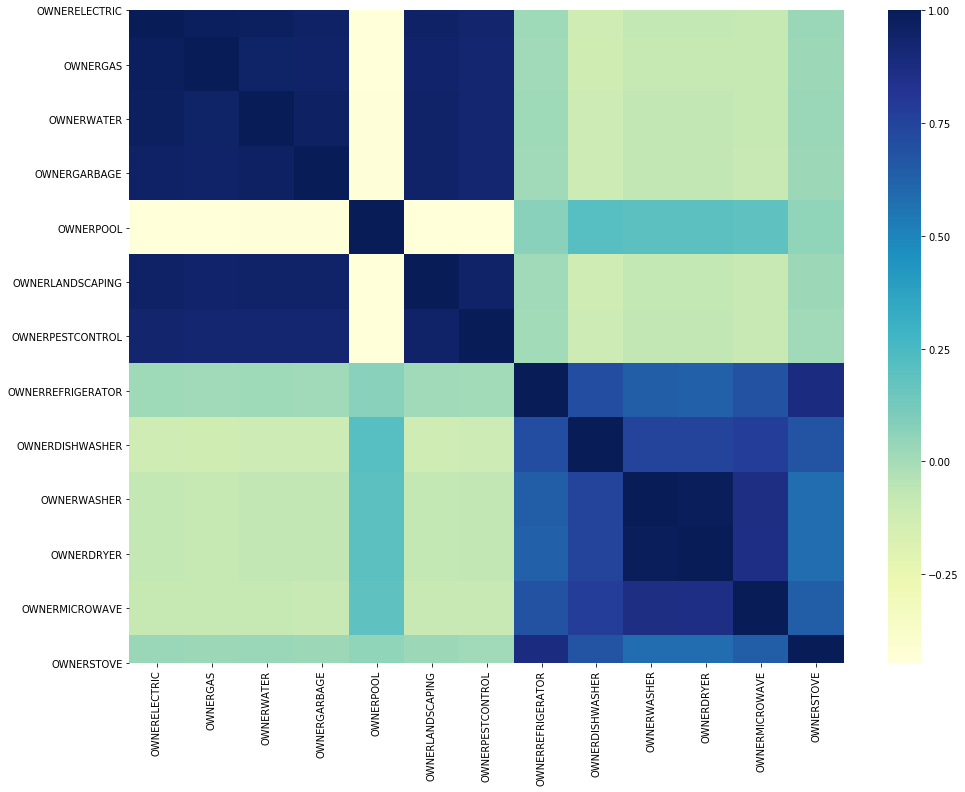

In [782]:
plt.figure(figsize=(16,12))
sns.heatmap(newdf.iloc[:,83:96].corr(), cmap = 'YlGnBu')

Text(0.5, 0, 'allowed funding types')

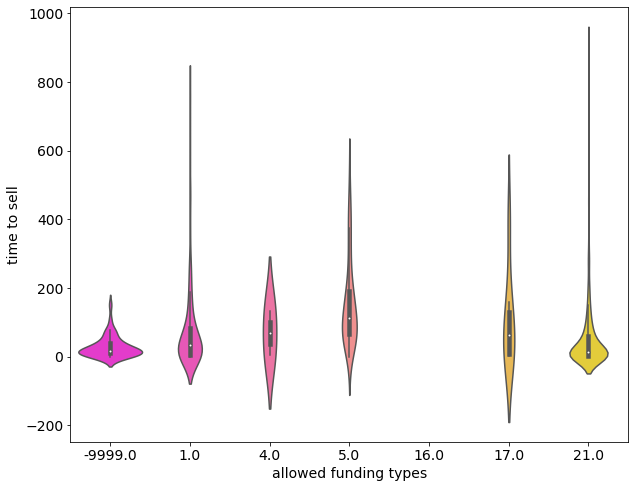

In [791]:
#### diff_days vs. ALLOWED FUNDING TYPES
### 留
plt.figure(figsize=(10,8))
sns.violinplot(z.ALLOWEDFUNDINGTYPES,z.diff_days,palette='spring')
plt.ylabel('time to sell',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('allowed funding types',fontsize=14)

Text(0, 0.5, 'Time to sell')

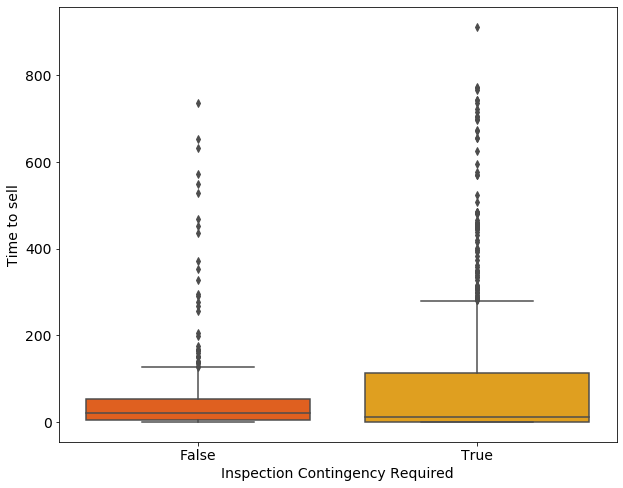

In [807]:
#### diff_days vs. INSPECTION_CONTINGENCY_REQUIRED
#### 留
plt.figure(figsize=(10,8))
sns.boxplot(z.INSPECTION_CONTINGENCY_REQUIRED,z.diff_days,palette='autumn')
plt.xlabel('Inspection Contingency Required',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Time to sell',fontsize=14)

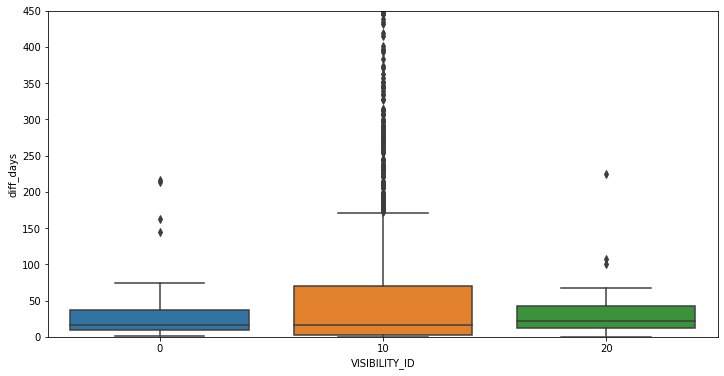

In [688]:
#### diff_days vs. VISIBILITY_ID
#留
plt.figure(figsize=(12,6))
plt.ylim([0,450])
sns.boxplot(z.VISIBILITY_ID,z.diff_days)

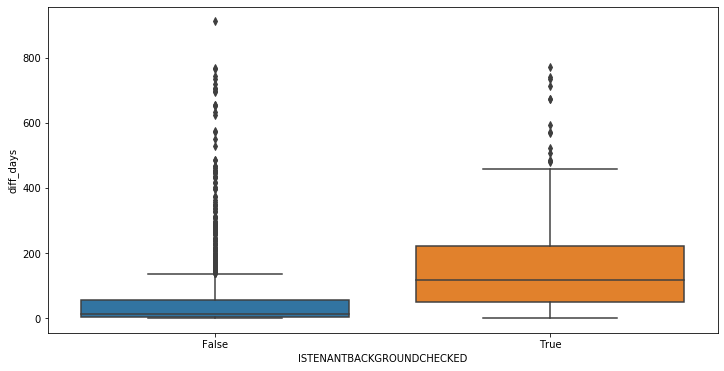

In [690]:
#### diff_days vs. IS TENANT BACKGROUND CHECKED
### 留
plt.figure(figsize=(12,6))
sns.boxplot(z.ISTENANTBACKGROUNDCHECKED,z.diff_days)

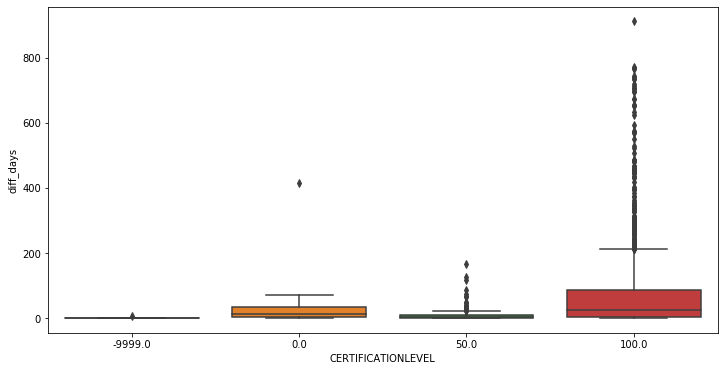

In [692]:
#### diff_days vs. CERTIFICATION LEVEL
#### 删-9999， 留
plt.figure(figsize=(12,6))
sns.boxplot(z.CERTIFICATIONLEVEL,z.diff_days)

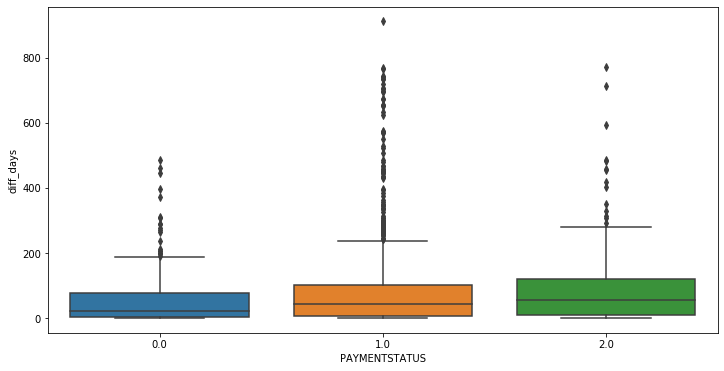

In [696]:
#### diff_days vs. PAYMENTSTATUS
plt.figure(figsize=(12,6))
sns.boxplot(z.PAYMENTSTATUS,z.diff_days)

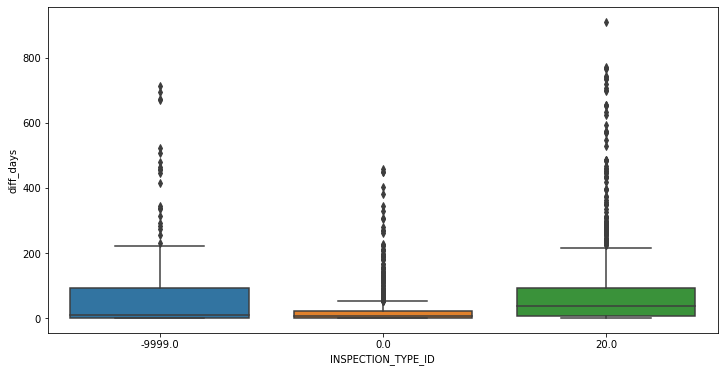

In [698]:
#### diff_days vs. INSPECTION_TYPE_ID
plt.figure(figsize=(12,6))
sns.boxplot(z.INSPECTION_TYPE_ID,z.diff_days)

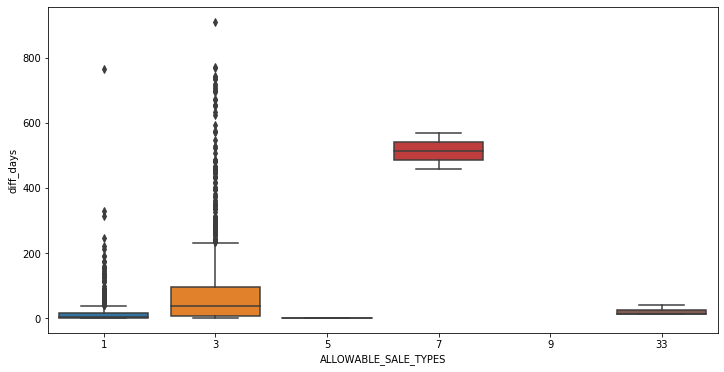

In [700]:
#### diff_days vs. ALLOWABLE_SALE_TYPES
plt.figure(figsize=(12,6))
sns.boxplot(z.ALLOWABLE_SALE_TYPES,z.diff_days)

### HAS OFFER OR NOT

<Figure size 1728x864 with 0 Axes>

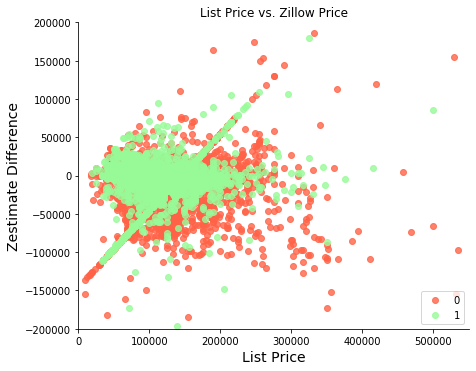

In [765]:
# List Price vs. Zillow Price
plt.figure(figsize=(24,12))
sns.lmplot( x="LIST_PRICE", y="ZESTIMATE_DIFFERENCE", data=newdf, fit_reg=False, hue='OFFER_OR_NOT',
           palette=["tomato", 'palegreen'],legend=False,aspect=16/12)
plt.xlim([0,550000])
plt.ylim([-200000,200000])
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('List Price', fontsize=14)
plt.ylabel('Zestimate Difference', fontsize=14)
plt.legend(loc='lower right')
plt.title('List Price vs. Zillow Price')
plt.show()

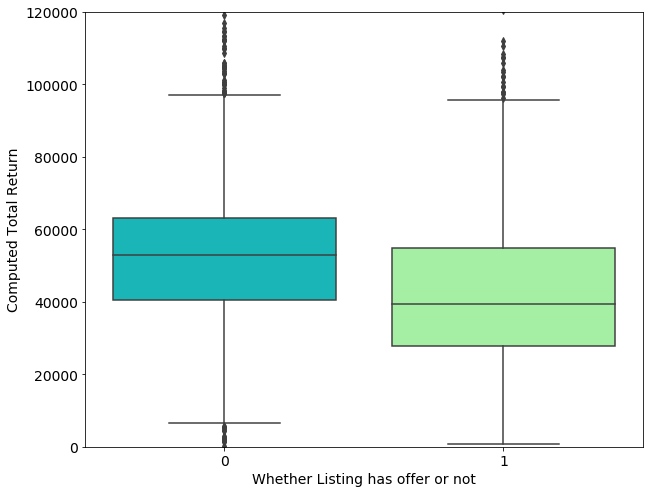

In [742]:
#### COMPUTEDTOTALRETURN 
plt.figure(figsize=(10,8))
sns.boxplot(newdf.OFFER_OR_NOT,newdf.COMPUTEDTOTALRETURN,palette=["darkturquoise", 'palegreen'])
plt.ylim([0,120000])
plt.xlabel('Whether Listing has offer or not', fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('Computed Total Return', fontsize=14)
plt.yticks(fontsize=14)

plt.show()

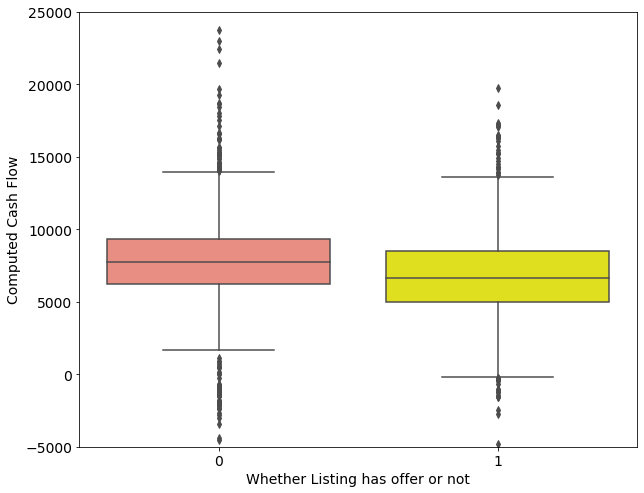

In [741]:
#### COMPUTEDCASHFLOW
plt.figure(figsize=(10,8))
sns.boxplot(newdf.OFFER_OR_NOT,newdf.COMPUTEDCASHFLOW,palette=['salmon','yellow'])
plt.ylim([-5000,25000])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Whether Listing has offer or not', fontsize=14)
plt.ylabel('Computed Cash Flow', fontsize=14)
plt.show()

<Figure size 1008x864 with 0 Axes>

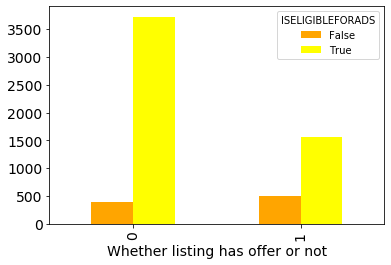

In [744]:
#### ISELIGIBLEFORADS
plt.figure(figsize=(14,12))
pd.crosstab(index=newdf.OFFER_OR_NOT, columns=newdf.ISELIGIBLEFORADS).loc[[0,1]]. plot(kind='bar',color=['orange','yellow'])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Whether listing has offer or not', fontsize=14)
#plt.ylabel('Is Eligible for Ads', fontsize=14)
#plt.title('Is Eligible For Ads ',size = 15)
plt.show()

<Figure size 1008x864 with 0 Axes>

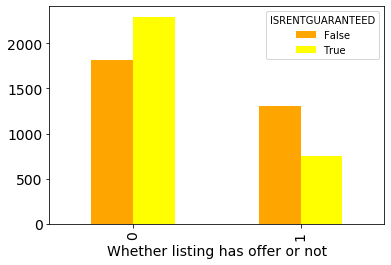

In [746]:
#### IS RENT GUARANTEED
plt.figure(figsize=(14,12))
pd.crosstab(index=newdf.OFFER_OR_NOT, columns=newdf.ISRENTGUARANTEED).loc[[0,1]]. plot(kind='bar',color=['orange','yellow'])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Whether listing has offer or not', fontsize=14)
#plt.title('Is Rent Guaranteed',size = 15)
plt.show()

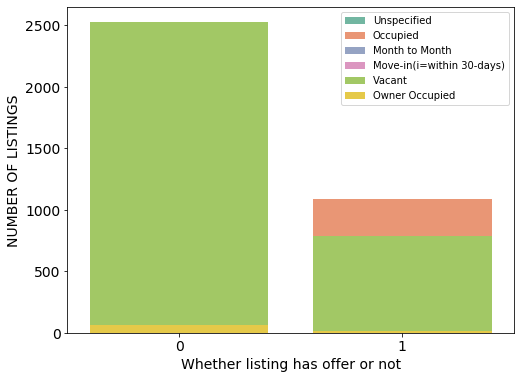

In [752]:
#### Occupacy
plt.figure(figsize=(8,6))
sns.countplot(x=newdf['OFFER_OR_NOT'],hue=newdf['OCCUPANCY'],palette='Set2',dodge=False)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('NUMBER OF LISTINGS',fontsize=14)
plt.xlabel('Whether listing has offer or not',fontsize=14)
plt.legend(['Unspecified', 'Occupied', 'Month to Month',
                                            'Move-in(i=within 30-days)', 'Vacant','Owner Occupied'],loc='upper right')
#plt.title('Occupacy',size = 15)
plt.show()

<Figure size 1440x1152 with 0 Axes>

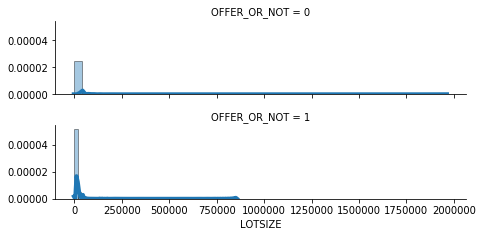

In [757]:
plt.figure(figsize=(20,16))
g = sns.FacetGrid(newdf, row="OFFER_OR_NOT",
                  height=1.7, aspect=4,)
g.map(sns.distplot, "LOTSIZE", hist=True, kde=True,hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 4});

<Figure size 1440x1152 with 0 Axes>

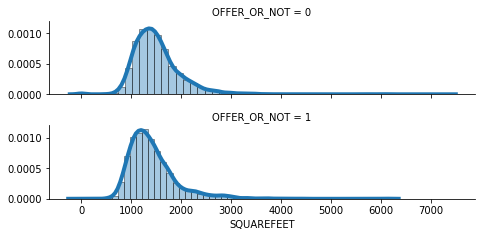

In [758]:
plt.figure(figsize=(20,16))
g = sns.FacetGrid(newdf, row="OFFER_OR_NOT",
                  height=1.7, aspect=4,)
g.map(sns.distplot, "SQUAREFEET", hist=True, kde=True,hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 4});

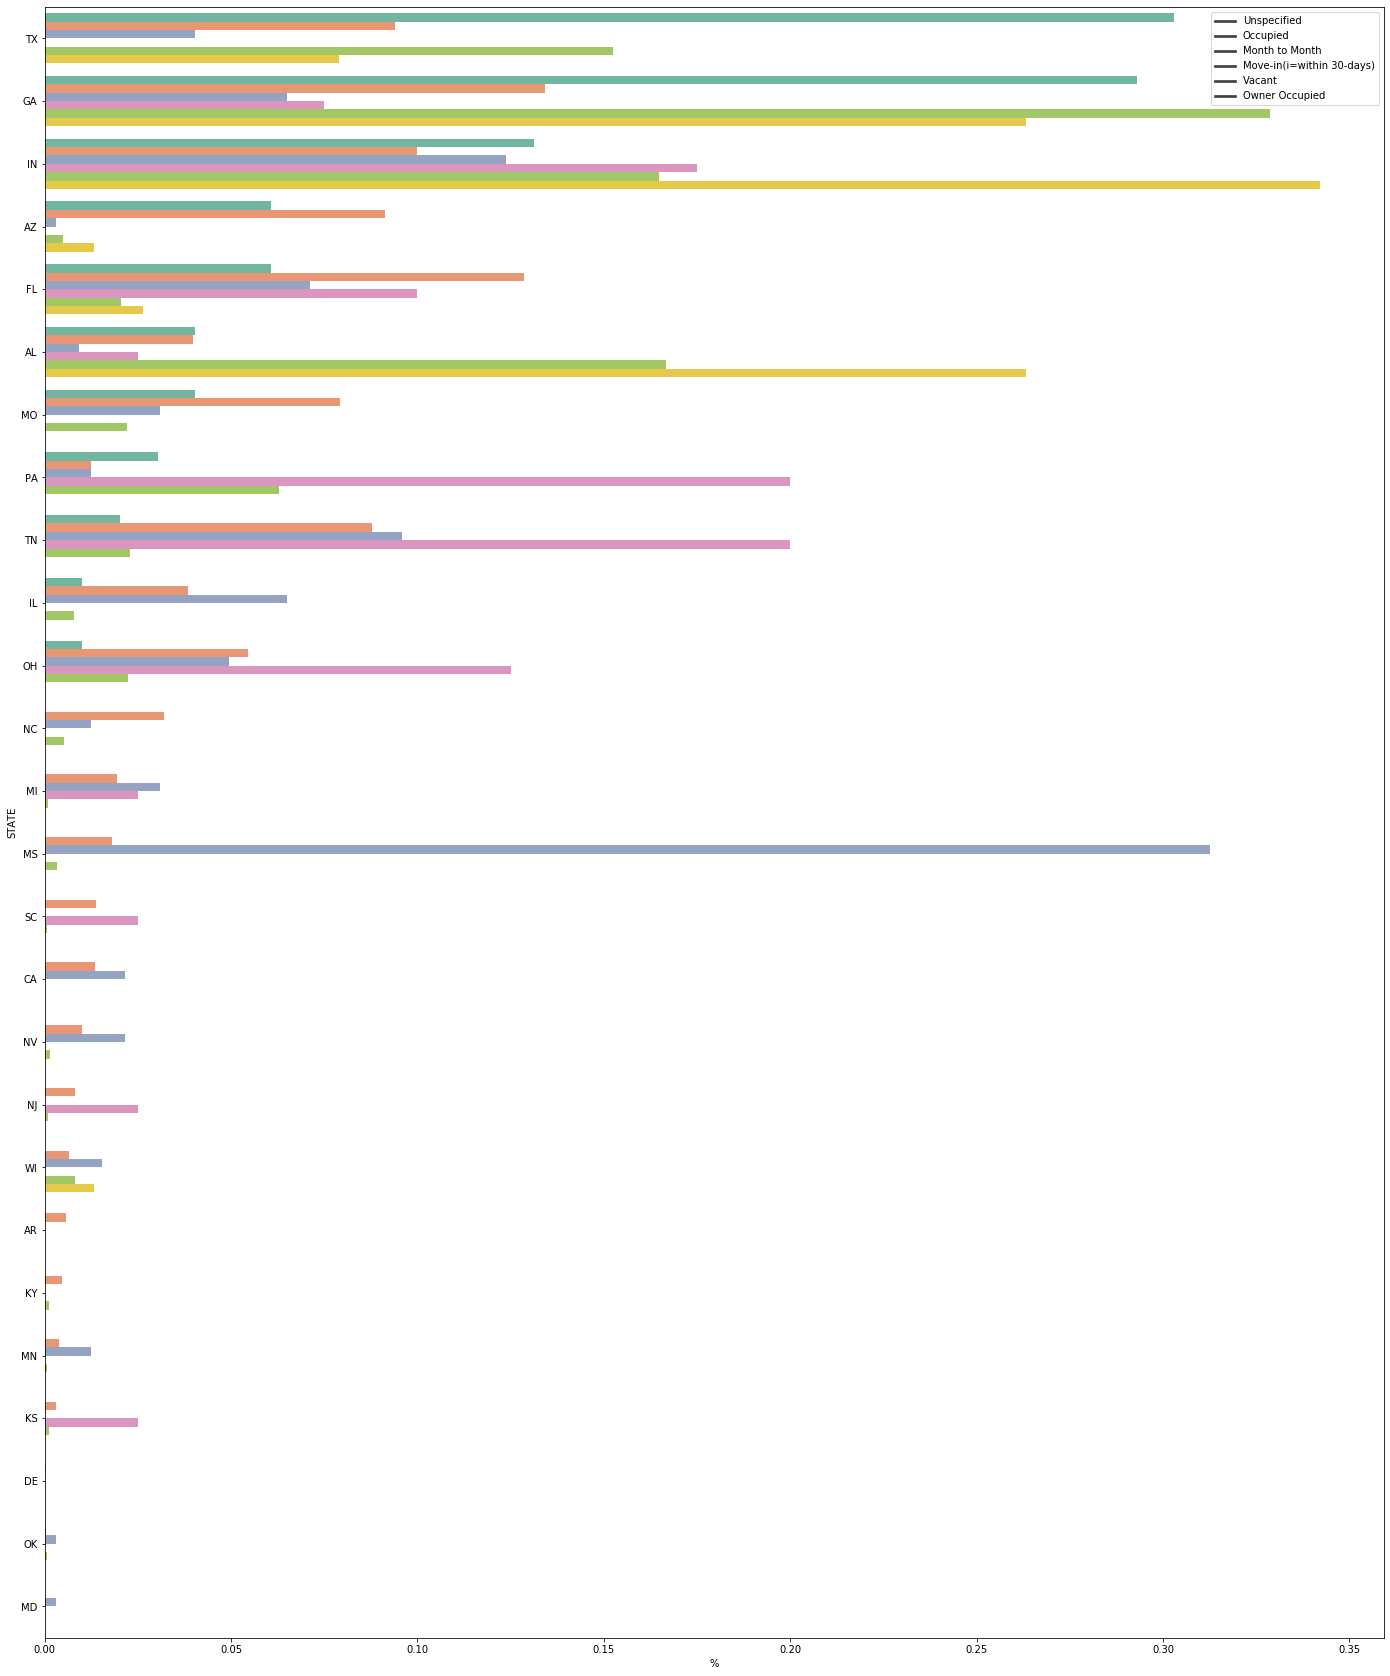

In [749]:
x, y, hue = 'STATE', '%', 'OCCUPANCY'
plt.figure(figsize=(24,30))
prop_df = (df_time[x]
           .groupby(df_time[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=y, y=x, hue=hue, data=prop_df,palette='Set2')
plt.legend(labels=['Unspecified', 'Occupied', 'Month to Month',
                                            'Move-in(i=within 30-days)', 'Vacant','Owner Occupied'])

In [ ]:
a=listing[['LISTING_ID','LISTING_INITIAL_PUBLISH_TS']]
a=a.dropna()
len(a['LISTING_ID'].unique())

len(df[~df['LISTING_INITIAL_PUBLISH_TS'].isnull()])
df[df['BEDROOMS']==0]
df=df.drop_duplicates(subset=['LISTING_ID'],keep='last')
df_no_offer=df[df['OFFER_OR_NOT']==0]

# Create a dataframe
df_offer=df[df['OFFER_OR_NOT']==1]
STATE=df_offer.groupby('STATE')['diff_days'].median()
STATE=STATE.sort_values(ascending=False)
STATE

plt.figure(figsize=(12,10))
plt.hlines(y=STATE.index, xmin=0, xmax=STATE.iloc[:], color='orange')
plt.plot(STATE.iloc[:],STATE.index, "o",color='red')
 
# Add titles and axis names
plt.yticks(STATE.index)
plt.title("STATE vs TIME TO SELL")
plt.xlabel('Time to sell')
plt.ylabel('STATE')

In [ ]:
BED_no=df_no_offer.groupby('BEDROOMS')['SQUAREFEET'].median()
BED_no=BED_no.sort_values(ascending=False)
plt.figure(figsize=(8,6))
sns.barplot(BED_no.index,BED_no[:],palette='autumn')
plt.title('BEDROOMS VS SQUAREFEET (no offer)',size = 15)

In [ ]:
BED=df_offer.groupby('BEDROOMS')['SQUAREFEET'].median()
BED=BED.sort_values(ascending=False)
plt.figure(figsize=(8,6))
sns.barplot(BED.index,BED[:],palette='autumn')
plt.title('BEDROOMS VS SQUAREFEET (offer)',size = 15)

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(df_no_offer['BEDROOMS'])
plt.title("LISTINGS WITHOUT OFFER vs BEDROOMS",size=15)

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(df_offer['BEDROOMS'])
plt.title("LISTINGS WITH OFFER vs BEDROOMS",size=15)

In [ ]:
plt.figure(figsize=(8,6))
BATH=df_offer.groupby('BATHROOMS')['SQUAREFEET'].median()
BATH=BATH.sort_values(ascending=False)
sns.barplot(BATH.index,BATH[:],palette='autumn')
plt.title('BATHROOMS VS SQUAREFEET (no offer)',size = 15)

In [ ]:
plt.figure(figsize=(8,6))
BATH_no=df_no_offer.groupby('BATHROOMS')['SQUAREFEET'].median()
BATH_no=BATH_no.sort_values(ascending=False)
sns.barplot(BATH_no.index,BATH_no[:],palette='autumn')
plt.title('BATHROOMS VS SQUAREFEET (offer)',size = 15)

In [ ]:
df_no_offer['BATHROOMS']=df_no_offer['BATHROOMS'].replace(2.8,2.5)
df_no_offer['BATHROOMS']=df_no_offer['BATHROOMS'].replace(1.8,1.5)

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(df_no_offer['BATHROOMS'])
plt.title('NUMBER OF LISTINGS vs BATHROOMS (no offer)',size = 15)

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(df_offer['BATHROOMS'])
plt.title('NUMBER OF LISTINGS vs BATHROOMS (offer)',size = 15)

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(df_offer['LISTING_SOURCE'],palette='autumn')
plt.title('NUMBER OF OFFERS OF DIFFERENT LISTING SOURCES',size = 15)

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x='LISTING_SOURCE',y='OFFER_OR_NOT',data=df,estimator=lambda x:sum(x==1)*100.0/len(x),palette='autumn')
plt.ylabel('OFFER PERCENTAGE')
plt.title('PERCENTAGE OF GETTING OFFERS OF DIFFERENT LISTING SOURCES',size = 15)

In [ ]:
plt.figure(figsize=(12,10))
plt.plot(df_time.groupby('INITIAL_PUBLISH_MONTH').count()['LISTING_STATUS'],color='orange')
plt.ylabel('NUMBER OF LISTINGS')
plt.title('NUMBER OF LISTINGS PUBLISHED IN DIFFERENT MONTHS',size = 15)

In [ ]:
plt.figure(figsize=(12,10))
plt.plot(df_offer.groupby('OFFER_MONTH').count()['LISTING_STATUS'],color='orange')
plt.ylabel('NUMBER OF LISTINGS GOT OFFERS')
plt.title('NUMBER OF LISTINGS GOT OFFERS IN DIFFERENT MONTHS',size = 15)

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x=df_time['STATE'],hue=df_time['OCCUPANCY'],orient='h')
plt.ylabel('NUMBER OF LISTINGS')
plt.legend(['Unspecified', 'Occupied', 'Month to Month',
                                            'Move-in(i=within 30-days)', 'Vacant','Owner Occupied'],loc='upper right')
plt.title('NUMBER OF LISTINGS PUBLISHED IN DIFFERENT MONTHS GROUPBY OCCUPANCY',size = 15)

In [ ]:
# Prepare Data
#df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
#df = df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x: x.mean())
#df.sort_values('cty', inplace=True)
#df.reset_index(inplace=True)

# Draw plot
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
ax.hlines(y=PERCENTAGE1['STATE'], xmin=0, xmax=1,color='gray', alpha=0.7, linewidth=1, linestyles='dashdot')
ax.scatter(y=PERCENTAGE1['STATE'], x=PERCENTAGE1['RATE'], s=75, color='firebrick', alpha=0.7)

# Title, Label, Ticks and Ylim
ax.set_title('OCCUPIED RATE FOR DIFFERENT STATES', fontdict={'size':22})
ax.set_xlabel('OCCUPIED RATE')
ax.set_yticks(PERCENTAGE1['STATE'])
ax.set_yticklabels(PERCENTAGE1['STATE'], fontdict={'horizontalalignment': 'right'})
ax.set_xlim(0, 1)
plt.show()

In [ ]:
plt.figure(figsize=(12,10))
sns.barplot(PERCENTAGE1['RATE'],PERCENTAGE1['STATE'])
plt.title('OCCUPIED RATE FOR DIFFERENT STATES',size=20)

In [ ]:
plt.figure(figsize=(12,10))
sns.barplot(PERCENTAGE_VACANCY['RATE'],PERCENTAGE_VACANCY['STATE'],palette='winter')
plt.title('VACANCY RATE FOR DIFFERENT STATES',size=20)

In [ ]:
# Title, Label, Ticks and Ylim
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
ax.hlines(y=PERCENTAGE_VACANCY['STATE'], xmin=0, xmax=1,color='gray', alpha=0.7, linewidth=1, linestyles='dashdot')
ax.scatter(PERCENTAGE_VACANCY['RATE'],PERCENTAGE_VACANCY['STATE'], s=75, color='blue', alpha=0.7)
ax.set_title('VACANCY RATE FOR DIFFERENT STATES', fontdict={'size':22})
ax.set_xlabel('VACANCY RATE')
ax.set_yticks(PERCENTAGE1['STATE'])
ax.set_yticklabels(PERCENTAGE1['STATE'], fontdict={'horizontalalignment': 'right'})
plt.show()

In [ ]:
plt.figure(figsize=(12,10))
sns.barplot(PERCENTAGE_ONWEROCCUPIED['RATE'].sort_values(),PERCENTAGE_ONWEROCCUPIED['STATE'],palette='RdYlGn_r')
plt.title('ONWER OCCUPIED RATE FOR DIFFERENT STATES',size=20)

In [ ]:
PERCENTAGE=df_time['OCCUPANCY'].groupby(df_time['STATE']).value_counts(normalize=True).rename('RATE').reset_index()

PERCENTAGE1=PERCENTAGE[PERCENTAGE['OCCUPANCY']==1].sort_values(by='RATE',ascending=False)
PERCENTAGE_VACANCY=PERCENTAGE[PERCENTAGE['OCCUPANCY']==100].sort_values(by='RATE',ascending=False)
PERCENTAGE_ONWEROCCUPIED=PERCENTAGE[PERCENTAGE['OCCUPANCY']==110].sort_values(by='RATE',ascending=False)

PERCENTAGE.sort_values('STATE')

In [ ]:
# Draw Stripplot
fig, ax = plt.subplots(figsize=(12,8), dpi= 80)    
sns.stripplot(df_time['LISTING_SOURCE'], df_time['COMPUTEDLEVEREDNETYIELD'],hue=df_time['OFFER_OR_NOT'],palette='Set3', size=8, ax=ax, linewidth=.5)
plt.ylim([0,0.6])
# Decorations
plt.title('COMPUTED LEVERED NET YIELD vs LISTING SOURCE', fontsize=15)
plt.show()

In [ ]:
# Draw Stripplot
fig, ax = plt.subplots(figsize=(12,8), dpi= 80)    
a=sns.stripplot(df_time['COMPUTEDLEVEREDNETYIELD'],df_time['MLSNAME'], size=8, ax=ax, linewidth=.5)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
a.set_xticklabels(labels,rotation=90)
# Decorations
plt.title('COMPUTED GROSS YIELD vs LISTING SOURCE', fontsize=15)
plt.show()

In [ ]:
fig,ax = plt.subplots(figsize=(12,10))
ax.plot(df_time.groupby('MLSNAME')['COMPUTED_GROSS_YIELD'].mean(),'-r')
ax.set_xlabel('Initial Publish Month',fontsize=14)
ax.set_ylabel('Computed gross yield',color="red",fontsize=14)
ax2=ax.twinx()
ax2.plot(df_time.groupby('INITIAL_PUBLISH_MONTH')['COMPUTEDLEVEREDNETYIELD'].mean(),'--g')
ax2.set_ylabel('Computed levered net yield',color="green",fontsize=14)
plt.show()

In [ ]:
plt.figure(figsize=(12,10))
plt.plot(df_time.groupby('LISTING_SOURCE')['COMPUTED_GROSS_YIELD'].mean(),'-r')
plt.plot(df_time.groupby('LISTING_SOURCE')['COMPUTEDLEVEREDNETYIELD'].mean(),'--g')
plt.legend(loc='upper right')

In [ ]:
fig,ax = plt.subplots(figsize=(12,10))
ax.plot(df_time.groupby('MONTH')['COMPUTED_GROSS_YIELD'].mean(),'-r')
ax.set_xlabel('Month',fontsize=14)
ax.set_ylabel('Computed gross yield',color="red",fontsize=14)
ax2=ax.twinx()
ax2.plot(df_time.groupby('MONTH')['COMPUTEDTOTALRETURN'].mean(),'--g')
ax2.set_ylabel('Computed Total Return',color="green",fontsize=14)
plt.show()

In [ ]:
plt.plot(df_time.groupby('MONTH')['COMPUTED_GROSS_YIELD'].sum(), '-b', label='Computed gross yield')
plt.plot(df_time.groupby('MONTH')['COMPUTEDLEVEREDNETYIELD'].sum(), '--r', label='Computed levered net yield')
plt.plot(df_time.groupby('Month'))

In [ ]:
df_time_offer=df_time[df_time['diff_days']!=920]

In [ ]:
plt.figure(figsize=(12,10))
sns.lineplot(df_time_offer['MONTH'],df_time_offer['diff_days'],color='orange')
plt.ylabel('TIME TO SELL')
plt.title('TIME TO SELL FOR LISTINGS PUBLISHED IN DIFFERENT MONTHS',size = 15)

In [ ]:
plt.figure(figsize=(12,10))
df_time.groupby('MONTH').mean()['COMPUTEDAPPRECIATION'].plot()

In [ ]:
aa=listing[['LISTING_ID','CITY','ZIP','COUNTY']].drop_duplicates()
aa['COUNTY']=aa['COUNTY'].fillna('kongzhi')
d=aa[aa['LISTING_ID']==1625006].index
aa=aa.drop(d)
aa=aa.drop_duplicates(subset='LISTING_ID')

city_dict=aa.set_index('LISTING_ID')['CITY'].to_dict()
zip_dict=aa.set_index('LISTING_ID')['ZIP'].to_dict()
county_dict=aa.set_index('LISTING_ID')['CITY'].to_dict()

df['CITY']=df['LISTING_ID'].map(lambda x: city_dict[x])
df['ZIP']=df['LISTING_ID'].map(lambda x: zip_dict[x])
df['COUNTY']=df['LISTING_ID'].map(lambda x: county_dict[x])

df.to_csv('eda.csv',index=False)
df1=df.drop(df[df['OFFER_PRICE']==-9].index)

## Training Dataset

In [ ]:
import pandas as pd
pd.set_option('max_columns',1000)
pd.set_option('max_rows',1000)
import datetime
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tqdm import tqdm

In [ ]:
buyer=pd.read_csv('roofstock_marketplace_buyers_full.csv')
listing=pd.read_csv('roofstock_marketplace_listing_historical_full.csv')
offer=pd.read_csv('roofstock_marketplace_offers_full.csv')
transaction=pd.read_csv('roofstock_marketplace_transactions_full.csv')
site=pd.read_csv('site_activity.csv')
final=pd.read_csv('final_df.csv')

final['EVENT_UTC']=pd.to_datetime(final['EVENT_UTC'])
final['CREATED_TS']=pd.to_datetime(final['CREATED_TS'])
final['diff_days']=final.apply(lambda x: x['EVENT_UTC']- x['CREATED_TS'], axis=1)
final['diff_days']=final['diff_days'].map(lambda x: x.days)

listing1=listing[listing['LIST_PRICE'].isnull()==False]
total_nooffer=listing1[~listing1['LISTING_ID'].isin(list(final['LISTING_ID'].unique()))]
nooffer=total_nooffer.groupby('LISTING_ID').apply(lambda t: t[t.REC_START_TS==t.REC_START_TS.min()]).drop_duplicates()

nooffer['EVENT_UTC']='2019-08-18 19:16:50.144 +0000'
nooffer['OFFER_ID']=1234567
nooffer['OFFER_PRICE']=-9999
nooffer['discount']=1
nooffer['diff_days']=1001
nooffer=nooffer.drop('PROPERTYSUMMARY',axis=1)

use_df=pd.concat([final,nooffer])

In [ ]:
#use_listing=listing.sort_values("REC_END_TS",ascending=True)
use_listing=listing.dropna(subset=['LIST_PRICE'])
#use_listing=use_listing.drop_duplicates(subset=['LISTING_ID','LIST_PRICE'],keep='first')
#use_listing=use_listing.reset_index().drop('index',axis=1)

In [ ]:
dup_list=list(set(use_listing)-set(droplist))
use_listing=use_listing.sort_values("REC_END_TS",ascending=True)
use_listing=use_listing.drop_duplicates(subset=dup_list,keep='first')
offer0=offer[offer['OFFER_DIRECTION']=='BuyerToSeller'][['EVENT_UTC','OFFER_PRICE','LISTING_ID']]
tt=transaction[transaction['OFFER_ID']==-99][['EVENT_UTC','SALE_PRICE','LISTING_ID']]
tt=tt.rename(columns={'SALE_PRICE':'OFFER_PRICE'})
offer0=pd.concat([offer0,tt])


In [ ]:
utc=[]
offerprice=[]
for i in tqdm(list(use_listing.index)):
    c_id=use_listing['LISTING_ID'][i]
    c_time=use_listing['REC_END_TS'][i]
    use_offer=offer0[offer0['LISTING_ID']==c_id]
    if len(use_offer)==0:
        utc.append('2020-08-18 19:16:50.144 +0011')
        offerprice.append(-9)
    else:
        offer1=use_offer[use_offer['EVENT_UTC']>c_time]
        if len(offer1)==0:
            utc.append('BUXING')
            offerprice.append(-9)
        else:
            offer1.sort_values("EVENT_UTC",inplace=True,ascending=True)
            utc.append(offer1.iloc[0]['EVENT_UTC'])
            offerprice.append(offer1.iloc[0]['OFFER_PRICE'])

In [ ]:
use_listing['EVENT_UTC']=utc
use_listing['OFFER_PRICE']=offerprice

In [ ]:
f_use_listing=use_listing.drop(use_listing[use_listing['EVENT_UTC']=='BUXING'].index)
f_use_listing['EVENT_UTC']=pd.to_datetime(f_use_listing['EVENT_UTC'])
f_use_listing['CREATED_TS']=pd.to_datetime(f_use_listing['CREATED_TS'])
f_use_listing['diff_days']=f_use_listing.apply(lambda x: x['EVENT_UTC']- x['CREATED_TS'], axis=1)
f_use_listing['diff_days']=f_use_listing['diff_days'].map(lambda x: x.days)
f_use_listing=f_use_listing.drop('PROPERTYSUMMARY',axis=1)
for i in list(f_use_listing[f_use_listing['EVENT_UTC']=='2020-08-18 19:16:50.144 +0011'].index):
    f_use_listing.set_value(i, 'diff_days', 1015)

In [ ]:
f_use_listing.to_csv('latter_final.csv')

In [ ]:
buyer=pd.read_csv('roofstock_marketplace_buyers_full.csv')
listing=pd.read_csv('roofstock_marketplace_listing_historical_full.csv')
offer=pd.read_csv('roofstock_marketplace_offers_full.csv')
transaction=pd.read_csv('roofstock_marketplace_transactions_full.csv')
site=pd.read_csv('site_activity.csv')

In [ ]:
aa=listing[listing['LISTING_PUBLISH_TS'].isnull()==False]
bb=aa[aa['LISTING_INITIAL_PUBLISH_TS'].isnull()==True]

In [ ]:
aa=listing[listing['LISTING_INITIAL_PUBLISH_TS'].isnull()==True]
ll=list(aa['LISTING_ID'].unique())

In [ ]:
cc=(offer['LISTING_ID']+transaction['LISTING_ID']).unique()

In [ ]:
xx=0
for i in ll:
    if i in cc:
        xx=+1

In [ ]:
pp=f_use_listing.dropna(subset=['LISTING_INITIAL_PUBLISH_TS','LISTING_PUBLISH_TS','LISTING_INTIAL_PUBLISH_DATE','LISTING_PUBLISH_DATE'],axis=0,how='all') 


In [ ]:
dd_list=list(set(f_use_listing['LISTING_ID'].unique())-set(pp['LISTING_ID'].unique()))

In [ ]:
abc=listing[['LISTING_ID','LISTING_INITIAL_PUBLISH_TS']].dropna().drop_duplicates().groupby('LISTING_ID').apply(lambda t: t[t.LISTING_INITIAL_PUBLISH_TS==t.LISTING_INITIAL_PUBLISH_TS.min()]).drop_duplicates()


In [ ]:
abc=abc.drop('LISTING_ID',axis=1).reset_index().drop('level_1',axis=1)

In [ ]:
abc_dict=abc.set_index('LISTING_ID')['LISTING_INITIAL_PUBLISH_TS'].to_dict()

In [ ]:
df=pd.read_csv('variables4.csv')
df=df.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)
STATE=pd.get_dummies(df['STATE'],dummy_na=True,prefix='STATE')
df=pd.concat([df,STATE],axis=1)
df=df.drop('STATE',axis=1)

In [ ]:
df['EVENT_UTC']=list(f_use_listing['EVENT_UTC'])
df['LISTING_ID']=list(f_use_listing['LISTING_ID'])

In [ ]:
df=df[df['LISTING_ID'].isin(list(abc['LISTING_ID']))]

In [ ]:
df['LISTING_INITIAL_PUBLISH_TS']=df['LISTING_ID'].map(lambda x:abc_dict[x])

df['EVENT_UTC']=pd.to_datetime(df['EVENT_UTC'])
df['LISTING_INITIAL_PUBLISH_TS']=pd.to_datetime(df['LISTING_INITIAL_PUBLISH_TS'])
df['diff_days']=df.apply(lambda x: x['EVENT_UTC']- x['LISTING_INITIAL_PUBLISH_TS'], axis=1)
df['diff_days']=df['diff_days'].map(lambda x: x.days)

In [ ]:
for i in df[df['EVENT_UTC']=='2020-08-18 19:05:50.144'].index:
    df.set_value(i,'diff_days',920)

In [ ]:
df=df[df['LISTING_ID']!=1625006]
df[['LISTING_ID']].drop_duplicates().to_csv('zillow_listing.csv',index=False)

In [ ]:
drop_listing=list(set(f_use_listing['LISTING_ID'])-set(df['LISTING_ID']))+[1625006]

In [ ]:
before_dummy=pd.read_csv('newfillnafinal.csv').drop('Unnamed: 0',axis=1)
before_dummy['EVENT_UTC']=list(f_use_listing['EVENT_UTC'])
before_dummy['LISTING_ID']=list(f_use_listing['LISTING_ID'])
before_dummy=before_dummy[before_dummy['LISTING_ID'].isin(list(abc['LISTING_ID']))]
before_dummy['LISTING_INITIAL_PUBLISH_TS']=before_dummy['LISTING_ID'].map(lambda x:abc_dict[x])
before_dummy['EVENT_UTC']=pd.to_datetime(before_dummy['EVENT_UTC'])
before_dummy['LISTING_INITIAL_PUBLISH_TS']=pd.to_datetime(before_dummy['LISTING_INITIAL_PUBLISH_TS'])
before_dummy['diff_days']=df.apply(lambda x: x['EVENT_UTC']- x['LISTING_INITIAL_PUBLISH_TS'], axis=1)
before_dummy['diff_days']=before_dummy['diff_days'].map(lambda x: x.days)
for i in before_dummy[before_dummy['EVENT_UTC']=='2020-08-18 19:05:50.144'].index:
    before_dummy.set_value(i,'diff_days',920)
before_dummy=before_dummy[before_dummy['LISTING_ID']!=1625006]

before_dummy.to_csv('eda_without_dummy.csv',index=False)

In [ ]:
newdf=before_dummy
#### Dummy Variables

ALLOWABLE_SALE_TYPES=pd.get_dummies(newdf['ALLOWABLE_SALE_TYPES'],dummy_na=False,prefix='ALLOWABLE_SALE_TYPES')
newdf=pd.concat([newdf,ALLOWABLE_SALE_TYPES],axis=1)
newdf=newdf.drop('ALLOWABLE_SALE_TYPES',axis=1)

ALLOWEDFUNDINGTYPES=pd.get_dummies(newdf['ALLOWEDFUNDINGTYPES'],dummy_na=False,prefix='ALLOWEDFUNDINGTYPES')
newdf=pd.concat([newdf,ALLOWEDFUNDINGTYPES],axis=1)
newdf=newdf.drop('ALLOWEDFUNDINGTYPES',axis=1)

CBSA_CODE=pd.get_dummies(newdf['CBSA_CODE'],dummy_na=False,prefix='CBSA_CODE')
newdf=pd.concat([newdf,CBSA_CODE],axis=1)
newdf=newdf.drop('CBSA_CODE',axis=1)

CERTIFICATIONLEVEL=pd.get_dummies(newdf['CERTIFICATIONLEVEL'],dummy_na=False,prefix='CERTIFICATIONLEVEL')
newdf=pd.concat([newdf,CERTIFICATIONLEVEL],axis=1)
newdf=newdf.drop('CERTIFICATIONLEVEL',axis=1)

TITLESTATUS=pd.get_dummies(newdf['TITLESTATUS'],dummy_na=True,prefix='TITLESTATUS')
newdf=pd.concat([newdf,TITLESTATUS],axis=1)
newdf=newdf.drop('TITLESTATUS',axis=1)

FLOODRISKSCORE=pd.get_dummies(newdf['FLOODRISKSCORE'],dummy_na=True,prefix='FLOODRISKSCORE')
newdf=pd.concat([newdf,FLOODRISKSCORE],axis=1)
newdf=newdf.drop('FLOODRISKSCORE',axis=1)

VISIBILITY_ID=pd.get_dummies(newdf['VISIBILITY_ID'],dummy_na=False,prefix='VISIBILITY_ID')
newdf=pd.concat([newdf,VISIBILITY_ID],axis=1)
newdf=newdf.drop('VISIBILITY_ID',axis=1)

KITCHENCONDITIONID=pd.get_dummies(newdf['KITCHENCONDITIONID'],dummy_na=False,prefix='KITCHENCONDITIONID')
newdf=pd.concat([newdf,KITCHENCONDITIONID],axis=1)
newdf=newdf.drop('KITCHENCONDITIONID',axis=1)

LANDSCAPINGCONDITIONID=pd.get_dummies(newdf['LANDSCAPINGCONDITIONID'],dummy_na=False,prefix='LANDSCAPINGCONDITIONID')
newdf=pd.concat([newdf,LANDSCAPINGCONDITIONID],axis=1)
newdf=newdf.drop('LANDSCAPINGCONDITIONID',axis=1)


LEASINGSTATUS=pd.get_dummies(newdf['LEASINGSTATUS'],dummy_na=True,prefix='LEASINGSTATUS')
newdf=pd.concat([newdf,LEASINGSTATUS],axis=1)
newdf=newdf.drop('LEASINGSTATUS',axis=1)

LISTING_SOURCE=pd.get_dummies(newdf['LISTING_SOURCE'],dummy_na=False,prefix='LISTING_SOURCE')
newdf=pd.concat([newdf,LISTING_SOURCE],axis=1)
newdf=newdf.drop('LISTING_SOURCE',axis=1)

LISTING_STATUS=pd.get_dummies(newdf['LISTING_STATUS'],dummy_na=False,prefix='LISTING_STATUS')
newdf=pd.concat([newdf,LISTING_STATUS],axis=1)
newdf=newdf.drop('LISTING_STATUS',axis=1)

MARKETPLACESORTORDER=pd.get_dummies(newdf['MARKETPLACESORTORDER'],dummy_na=False,prefix='MARKETPLACESORTORDER')
newdf=pd.concat([newdf,MARKETPLACESORTORDER],axis=1)
newdf=newdf.drop('MARKETPLACESORTORDER',axis=1)

MARKET_ID=pd.get_dummies(newdf['MARKET_ID'],dummy_na=False,prefix='MARKET_ID')
newdf=pd.concat([newdf,MARKET_ID],axis=1)
newdf=newdf.drop('MARKET_ID',axis=1)

MLSNAME=pd.get_dummies(newdf['MLSNAME'],dummy_na=False,prefix='MLSNAME')
newdf=pd.concat([newdf,MLSNAME],axis=1)
newdf=newdf.drop('MLSNAME',axis=1)

PAYMENTSTATUS=pd.get_dummies(newdf['PAYMENTSTATUS'],dummy_na=True,prefix='PAYMENTSTATUS')
newdf=pd.concat([newdf,PAYMENTSTATUS],axis=1)
newdf=newdf.drop('PAYMENTSTATUS',axis=1)

PLUMBINGCONDITIONID=pd.get_dummies(newdf['PLUMBINGCONDITIONID'],dummy_na=False,prefix='PLUMBINGCONDITIONID')
newdf=pd.concat([newdf,PLUMBINGCONDITIONID],axis=1)
newdf=newdf.drop('PLUMBINGCONDITIONID',axis=1)

ROOFCONDITIONID=pd.get_dummies(newdf['ROOFCONDITIONID'],dummy_na=False,prefix='ROOFCONDITIONID')
newdf=pd.concat([newdf,ROOFCONDITIONID],axis=1)
newdf=newdf.drop('ROOFCONDITIONID',axis=1)

STATE=pd.get_dummies(newdf['STATE'],dummy_na=False,prefix='STATE')
newdf=pd.concat([newdf,STATE],axis=1)
newdf=newdf.drop('STATE',axis=1)

In [ ]:
newdf.to_csv('without_estimate.csv', index = False)

In [ ]:
newdf['DISCOUNT']=newdf['OFFER_PRICE']/newdf['LIST_PRICE']

In [ ]:
newdf.drop(newdf[newdf])

## PCA

In [ ]:
from sklearn.decomposition import PCA
PCA_computed = PCA(n_components=8)
PCA_com = PCA_computed.fit_transform(df.iloc[:,52:70])
principal_com_Df = pd.DataFrame(data = PCA_com
             , columns = ['COM_PC1', 'COM_PC2','COM_PC3','COM_PC4','COM_PC5','COM_PC6','COM_PC7','COM_PC8'])

In [ ]:
principal_com_Df.head()